In [2]:
import pandas as pd

In [3]:
!pwd

/Users/nadirgmira/code/carbon-forecast/notebooks


In [4]:
data = pd.read_csv("../raw_data/Historical_Emissions.csv")
pd.set_option('display.max_columns', None)
data.head(4)


TCUID              Company          ISIN  Financial Year  GICS Sector Code  \
0  42694  Erste Group Bank AG  AT0000652011            2005              40.0   
1  42694  Erste Group Bank AG  AT0000652011            2006              40.0   
2  42694  Erste Group Bank AG  AT0000652011            2007              40.0   
3  42694  Erste Group Bank AG  AT0000652011            2008              40.0   

  GICS Sector Name  GICS Industry Group Code GICS Industry Group Name  \
0       Financials                    4010.0                    Banks   
1       Financials                    4010.0                    Banks   
2       Financials                    4010.0                    Banks   
3       Financials                    4010.0                    Banks   

   GICS Industry Code GICS Industry Name  GICS Sub Industry Code  \
0            401010.0              Banks              40101010.0   
1            401010.0              Banks              40101010.0   
2            401010.0              Banks              40101010.0   
3            401010.0              Banks              40101010.0   

  GICS Sub Industry Name                                   GICS Description  \
0      Diversified Banks  Commercial banks whose businesses are derived ...   
1      Diversified Banks  Commercial banks whose businesses are derived ...   
2      Diversified Banks  Commercial banks whose businesses are derived ...   
3      Diversified Banks  Commercial banks whose businesses are derived ...   

                                 Trucost Sector Name Trucost Sector  Country  \
0  Monetary authorities and depository credit int...         52A000  AUSTRIA   
1  Monetary authorities and depository credit int...         52A000  AUSTRIA   
2  Monetary authorities and depository credit int...         52A000  AUSTRIA   
3  Monetary authorities and depository credit int...         52A000  AUSTRIA   

   Carbon-Scope 1 (tonnes CO2e)  Carbon-Scope 2 (tonnes CO2e)  \
0                   7596.054435                   6814.325028   
1                  12552.501135                  10906.081210   
2                  11476.177472                   9656.932392   
3                  11104.953114                  19302.583214   

   Carbon-Scope 3 (tonnes CO2e)  Carbon-Direct (tonnes CO2e)  \
0                 164017.684486                  7596.054435   
1                 258799.303026                 12552.501135   
2                 232394.411879                 11476.177472   
3                 238060.077199                 11104.953114   

   Carbon-First Tier Indirect (tonnes CO2e)  \
0                              31981.789915   
1                              52125.089787   
2                              47397.574615   
3                              59544.335750   

   Carbon-Direct+First Tier Indirect (tonnes CO2e)  \
0                                     39577.844350   
1                                     64677.590922   
2                                     58873.752087   
3                                     70649.288864   

   Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)  \
0                                       1.347260   
1                                       1.308070   
2                                       1.270021   
3                                       1.139229   

   Carbon Intensity-Scope 2 (tonnes CO2e/USD mn)  \
0                                       1.208610   
1                                       1.136500   
2                                       1.068693   
3                                       1.980203   

   Carbon Intensity-Scope 3 (tonnes CO2e/USD mn)  \
0                                      29.090685   
1                                      26.968945   
2                                      25.718129   
3                                      24.421979   

   Carbon Intensity-Direct (tonnes CO2e/USD mn)  \
0                                      1.347260   
1                                      1.308070   
2  

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131061 entries, 0 to 131060
Data columns (total 41 columns):
 #   Column                                                            Non-Null Count   Dtype  
---  ------                                                            --------------   -----  
 0   TCUID                                                             131061 non-null  int64  
 1   Company                                                           131061 non-null  object 
 2   ISIN                                                              130690 non-null  object 
 3   Financial Year                                                    131061 non-null  int64  
 4   GICS Sector Code                                                  131060 non-null  float64
 5   GICS Sector Name                                                  131060 non-null  object 
 6   GICS Industry Group Code                                          131060 non-null  float64
 7   GICS Industry Group 

In [80]:
to_drop = ['ISIN','GICS Sector Code','GICS Industry Group Code','GICS Industry Code', 'GICS Sub Industry Code', \
          'GICS Description', 'Trucost Sector Name', 'Trucost Sector','Carbon Disclosure','Currency Code','Accounting Year End','FigureRestate', 'EffectiveDate','GICS Sector Name','GICS Sub Industry Name']

In [81]:
data_d = data.drop(columns=to_drop)

In [82]:
data_redux=data_d[['GICS Industry Group Name','TCUID']]

In [83]:
data_redux.shape

(131061, 2)

In [84]:
data_redux.drop_duplicates(inplace=True)

/var/folders/0k/1qhyws290kg0t6dgf70csbmm0000gn/T/ipykernel_3262/2701174569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_redux.drop_duplicates(inplace=True)


In [85]:
data_redux.shape

(21994, 2)

In [86]:
data_redux_sector=data_redux.groupby(by='GICS Industry Group Name').count()

<AxesSubplot:xlabel='GICS Industry Group Name'>

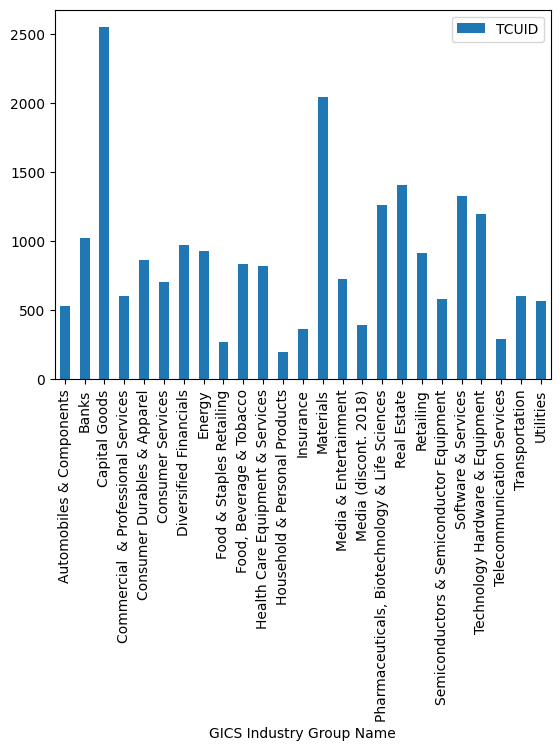

In [87]:
data_redux_sector.plot(kind='bar')

In [88]:
data_d['Country'].value_counts()

UNITED STATES             26584
JAPAN                     16792
CHINA                     13697
KOREA, REPUBLIC OF         7627
UNITED KINGDOM             7314
                          ...  
RÉUNION                       2
MALAWI                        2
TRINIDAD AND TOBAGO           2
BOSNIA AND HERZEGOVINA        1
ZAMBIA                        1
Name: Country, Length: 106, dtype: int64

In [89]:
data_d[data_d['Company'].str.contains(r'LVMH')][['Company','Country']].drop_duplicates()

Company Country
1314  LVMH-Moet Vuitton  FRANCE

In [90]:
data_d.columns

Index(['TCUID', 'Company', 'Financial Year', 'GICS Industry Group Name',
       'GICS Industry Name', 'Country', 'Carbon-Scope 1 (tonnes CO2e)',
       'Carbon-Scope 2 (tonnes CO2e)', 'Carbon-Scope 3 (tonnes CO2e)',
       'Carbon-Direct (tonnes CO2e)',
       'Carbon-First Tier Indirect (tonnes CO2e)',
       'Carbon-Direct+First Tier Indirect (tonnes CO2e)',
       'Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)',
       'Carbon Intensity-Scope 2 (tonnes CO2e/USD mn)',
       'Carbon Intensity-Scope 3 (tonnes CO2e/USD mn)',
       'Carbon Intensity-Direct (tonnes CO2e/USD mn)',
       'Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn)',
       'Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn)',
       'GHG-Direct (USD mn)', 'GHG-Indirect (USD mn)', 'GHG-Total (USD mn)',
       'GHG-Direct Impact Ratio (%)', 'GHG-Indirect Impact Ratio (%)',
       'GHG-Total Impact Ratio (%)', 'Carbon-Weighted Disclosure (%)',
       'Revenue (USD mn)'],
      dtype='object')

In [91]:

data_d[['GICS Industry Group Name', 'GICS Industry Name']].nunique()

GICS Industry Group Name    25
GICS Industry Name          71
dtype: int64

In [92]:
data_d['GICS Industry Name'].unique()

array(['Banks', 'Diversified Telecommunication Services',
       'Containers & Packaging', 'Insurance',
       'Diversified Financial Services', 'Metals & Mining',
       'Food & Staples Retailing', 'Beverages', 'Capital Markets',
       'Building Products', 'Industrial Conglomerates',
       'Multiline Retail', 'Oil, Gas & Consumable Fuels', 'Chemicals',
       'Distributors', 'Pharmaceuticals', 'Leisure Products',
       'Health Care Technology',
       'Electronic Equipment, Instruments & Components',
       'Commercial Services & Supplies', 'Machinery',
       'Textiles, Apparel & Luxury Goods', 'Energy Equipment & Services',
       'Food Products', 'Professional Services', 'Construction Materials',
       'Independent Power and Renewable Electricity Producers',
       'Personal Products', 'Electric Utilities', 'Auto Components',
       'Air Freight & Logistics', 'Health Care Equipment & Supplies',
       'Health Care Providers & Services', 'Household Products',
       'Semiconduct

In [93]:
group_1=data_d.groupby(by=['GICS Industry Group Name','TCUID','Financial Year'])
group_2=data_d.groupby(by=['Financial Year','TCUID','GICS Industry Group Name'])

In [1]:
value_data=['Carbon-Scope 1 (tonnes CO2e)',
       'Carbon-Scope 2 (tonnes CO2e)', 'Carbon-Scope 3 (tonnes CO2e)',
       'Carbon-Direct (tonnes CO2e)',
       'Carbon-First Tier Indirect (tonnes CO2e)',
       'Carbon-Direct+First Tier Indirect (tonnes CO2e)',
       'Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)',
       'Carbon Intensity-Scope 2 (tonnes CO2e/USD mn)',
       'Carbon Intensity-Scope 3 (tonnes CO2e/USD mn)',
       'Carbon Intensity-Direct (tonnes CO2e/USD mn)',
       'Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn)',
       'Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn)',
       'GHG-Direct (USD mn)', 'GHG-Indirect (USD mn)', 'GHG-Total (USD mn)',
       'GHG-Direct Impact Ratio (%)', 'GHG-Indirect Impact Ratio (%)',
       'GHG-Total Impact Ratio (%)', 'Carbon-Weighted Disclosure (%)',
       'Revenue (USD mn)']


In [95]:
# data_group_2=group_2.aggregate({'TCUID':'count')
d1={'TCUID':'count'}
d2=dict.fromkeys(value_data,'mean')
d3= {**d1,**d2}
d3
# data_group_2=group_2.aggregate({'TCUID':'count')

{'TCUID': 'count',
 'Carbon-Scope 1 (tonnes CO2e)': 'mean',
 'Carbon-Scope 2 (tonnes CO2e)': 'mean',
 'Carbon-Scope 3 (tonnes CO2e)': 'mean',
 'Carbon-Direct (tonnes CO2e)': 'mean',
 'Carbon-First Tier Indirect (tonnes CO2e)': 'mean',
 'Carbon-Direct+First Tier Indirect (tonnes CO2e)': 'mean',
 'Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)': 'mean',
 'Carbon Intensity-Scope 2 (tonnes CO2e/USD mn)': 'mean',
 'Carbon Intensity-Scope 3 (tonnes CO2e/USD mn)': 'mean',
 'Carbon Intensity-Direct (tonnes CO2e/USD mn)': 'mean',
 'Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn)': 'mean',
 'Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn)': 'mean',
 'GHG-Direct (USD mn)': 'mean',
 'GHG-Indirect (USD mn)': 'mean',
 'GHG-Total (USD mn)': 'mean',
 'GHG-Direct Impact Ratio (%)': 'mean',
 'GHG-Indirect Impact Ratio (%)': 'mean',
 'GHG-Total Impact Ratio (%)': 'mean',
 'Carbon-Weighted Disclosure (%)': 'mean',
 'Revenue (USD mn)': 'mean'}

In [96]:
data_group_2=group_2.aggregate(d3)
data_group_2

TCUID  \
Financial Year TCUID  GICS Industry Group Name                  
2005           42694  Banks                                 1   
               42695  Telecommunication Services            1   
               42696  Materials                             1   
               42697  Insurance                             1   
               42698  Banks                                 1   
...                                                       ...   
2021           247961 Media & Entertainment                 1   
               247966 Media & Entertainment                 1   
               247973 Health Care Equipment & Services      1   
               247974 Software & Services                   1   
               248357 Materials                             1   

                                                        Carbon-Scope 1 (tonnes CO2e)  \
Financial Year TCUID  GICS Industry Group Name                                         
2005           42694  Banks                                             7.596054e+03   
               42695  Telecommunication Services                        2.527257e+04   
               42696  Materials                                         3.750938e+06   
               42697  Insurance                                         5.853555e+03   
               42698  Banks                                             9.437451e+03   
...                                                                              ...   
2021           247961 Media & Entertainment                             2.543050e+02   
               247966 Media & Entertainment                             2.191850e+02   
               247973 Health Care Equipment & Services                  5.475210e+02   
               247974 Software & Services                               1.433070e+02   
               248357 Materials                                         2.555100e+02   

                                                        Carbon-Scope 2 (tonnes CO2e)  \
Financial Year TCUID  GICS Industry Group Name                                         
2005           42694  Banks                                              6814.325028   
               42695  Telecommunication Services                        74962.638307   
               42696  Materials                                        416389.565965   
               42697  Insurance                                         10711.340000   
               42698  Banks                                              8466.218905   
...                                                                              ...   
2021           247961 Media & Entertainment                               327.598000   
               247966 Media & Entertainment                               551.991000   
               247973 Health Care Equipment & Services                    495.730000   
               247974 Software & Services                                 261.325000   
               248357 Materials                                            71.268000   

                                                        Carbon-Scope 3 (tonnes CO2e)  \
Financial Year TCUID  GICS Industry Group Name                                         
2005           42694  Banks                                             1.640177e+05   
               42695  Telecommunication Services                        3.360206e+05   
               42696  Materials                                         3.760872e+06   
               42697  Insurance                                         6.177212e+05   
               42698  Banks                                             2.037780e+05   
...                                                                              ...   
2021           247961 Media & Entertainment                             2.201501e+03   
               247966 Media & Entertainment                             3.139741e+03   
               247973 Health Care Equipm

In [97]:
data_group_1=group_1.aggregate(d2)
data_group_1

Carbon-Scope 1 (tonnes CO2e)  \
GICS Industry Group Name TCUID  Financial Year                                 
Automobiles & Components 42766  2005                            8.788821e+05   
                                2006                            1.005393e+06   
                                2007                            1.139460e+06   
                                2008                            6.369446e+05   
                                2009                            5.501366e+05   
...                                                                      ...   
Utilities                247176 2020                            1.181560e+03   
                         247188 2020                            3.706984e+04   
                         247287 2020                            9.299901e+05   
                         247718 2020                            1.005854e+04   
                         247748 2020                            3.283940e+02   

                                                Carbon-Scope 2 (tonnes CO2e)  \
GICS Industry Group Name TCUID  Financial Year                                 
Automobiles & Components 42766  2005                            6.547886e+05   
                                2006                            7.363656e+05   
                                2007                            8.376056e+05   
                                2008                            1.132779e+06   
                                2009                            9.733945e+05   
...                                                                      ...   
Utilities                247176 2020                            3.244000e+00   
                         247188 2020                            9.847900e+01   
                         247287 2020                            6.489366e+03   
                         247718 2020                            1.053251e+03   
                         247748 2020                            1.657840e+02   

                                                Carbon-Scope 3 (tonnes CO2e)  \
GICS Industry Group Name TCUID  Financial Year                                 
Automobiles & Components 42766  2005                            7.807637e+06   
                                2006                            8.494345e+06   
                                2007                            9.725154e+06   
                                2008                            1.212678e+07   
                                2009                            1.106226e+07   
...                                                                      ...   
Utilities                247176 2020                            3.496640e+02   
                         247188 2020                            1.061588e+04   
                         247287 2020                            5.925516e+04   
                         247718 2020                            2.972177e+03   
                         247748 2020                            2.756061e+03   

                                                Carbon-Direct (tonnes CO2e)  \
GICS Industry Group Name TCUID  Financial Year                                
Automobiles & Components 42766  2005                           8.789854e+05   
                                2006                           1.005518e+06   
                                2007                           1.139622e+06   
                                2008                           6.371648e+05   
                                2009                           5.503152e+05   
...                                                                     ...   
Utilities                247176 2020                           1.181560e+03   
                         247188 2020                           3.706984e+04   
                         247287 2020                           9.299901e+05   
                         247718 2020                    

In [98]:
sectors=['Oil', 'Gas & Consumable Fuels','Electric Utilities','Automobiles,Airlines,Gas Utilities']

In [99]:
sector='Oil'

In [100]:
len(data.TCUID.unique())

19578

In [101]:
len(data.Company.unique())

19556

In [102]:
data[data.Company.str.contains(r'Toho Co.')]

TCUID         Company          ISIN  Financial Year  GICS Sector Code  \
28293   47749  Toho Co., Ltd.  JP3598600009            2005              25.0   
28294   47749  Toho Co., Ltd.  JP3598600009            2006              25.0   
28295   47749  Toho Co., Ltd.  JP3598600009            2007              25.0   
28296   47749  Toho Co., Ltd.  JP3598600009            2008              25.0   
28297   47749  Toho Co., Ltd.  JP3598600009            2009              25.0   
28298   47749  Toho Co., Ltd.  JP3598600009            2010              25.0   
28299   47749  Toho Co., Ltd.  JP3598600009            2011              25.0   
28300   47749  Toho Co., Ltd.  JP3598600009            2012              25.0   
28301   47749  Toho Co., Ltd.  JP3598600009            2013              25.0   
28302   47749  Toho Co., Ltd.  JP3598600009            2014              25.0   
28303   47749  Toho Co., Ltd.  JP3598600009            2015              25.0   
28304   47749  Toho Co., Ltd.  JP3598600009            2016              25.0   
28305   47749  Toho Co., Ltd.  JP3598600009            2017              50.0   
28306   47749  Toho Co., Ltd.  JP3598600009            2018              50.0   
28307   47749  Toho Co., Ltd.  JP3598600009            2019              50.0   
28308   47749  Toho Co., Ltd.  JP3598600009            2020              50.0   
88951  191694  Toho Co., Ltd.  JP3553200001            2016              30.0   
88952  191694  Toho Co., Ltd.  JP3553200001            2017              30.0   
88953  191694  Toho Co., Ltd.  JP3553200001            2018              30.0   
88954  191694  Toho Co., Ltd.  JP3553200001            2019              30.0   
88955  191694  Toho Co., Ltd.  JP3553200001            2020              30.0   

             GICS Sector Name  GICS Industry Group Code  \
28293  Consumer Discretionary                    2540.0   
28294  Consumer Discretionary                    2540.0   
28295  Consumer Discretionary                    2540.0   
28296  Consumer Discretionary                    2540.0   
28297  Consumer Discretionary                    2540.0   
28298  Consumer Discretionary                    2540.0   
28299  Consumer Discretionary                    2540.0   
28300  Consumer Discretionary                    2540.0   
28301  Consumer Discretionary                    2540.0   
28302  Consumer Discretionary                    2540.0   
28303  Consumer Discretionary                    2540.0   
28304  Consumer Discretionary                    2540.0   
28305  Communication Services                    5020.0   
28306  Communication Services                    5020.0   
28307  Communication Services                    5020.0   
28308  Communication Services                    5020.0   
88951        Consumer Staples                    3010.0   
88952        Consumer Staples                    3010.0   
88953        Consumer Staples                    3010.0   
88954        Consumer Staples                    3010.0   
88955        Consumer Staples                    3010.0   

       GICS Industry Group Name  GICS Industry Code        GICS Industry Name  \
28293     Media (discont. 2018)            254010.0     Media (discont. 2018)   
28294     Media (discont. 2018)            254010.0     Media (discont. 2018)   
28295     Media (discont. 2018)            254010.0     Media (discont. 2018)   
28296     Media (discont. 2018)            254010.0     Media (discont. 2018)   
28297     Media (discont. 2018)            254010.0     Media (discont. 2018)   
28298     Media (discont. 2018)            254010.0     Media (discont. 2018)   
28299     Media (discont. 2018)            254010.0     Media (discont. 2018)   
28300     Media (discont. 2018)            254010.0     Media (discont. 2018)   
28301     Media (discont. 2018)            254010.0     Media (discont. 2018)   
28302     Media (discont. 2018)            254010.0     Media (discont. 2018)   
28303     Media (discont. 2018)    

In [103]:
data["GICS Industry Group Name"].value_counts()

Capital Goods                                     15420
Materials                                         13183
Real Estate                                        8834
Banks                                              7702
Technology Hardware & Equipment                    6623
Energy                                             6221
Pharmaceuticals, Biotechnology & Life Sciences     6211
Software & Services                                5827
Food, Beverage & Tobacco                           5664
Diversified Financials                             5606
Retailing                                          5161
Consumer Durables & Apparel                        5014
Transportation                                     4490
Utilities                                          4474
Health Care Equipment & Services                   4089
Consumer Services                                  4064
Semiconductors & Semiconductor Equipment           3294
Automobiles & Components                        

In [104]:
data[data["GICS Industry Group Name"].isna()]

TCUID     Company          ISIN  Financial Year  GICS Sector Code  \
101485  224782  COMPAS INC  KYG2294M1134            2015               NaN   

       GICS Sector Name  GICS Industry Group Code GICS Industry Group Name  \
101485              NaN                       NaN                      NaN   

        GICS Industry Code GICS Industry Name  GICS Sub Industry Code  \
101485                 NaN                NaN                     NaN   

       GICS Sub Industry Name GICS Description  \
101485                    NaN              NaN   

                     Trucost Sector Name Trucost Sector        Country  \
101485  Advertising and related services         541800  UNITED STATES   

        Carbon-Scope 1 (tonnes CO2e)  Carbon-Scope 2 (tonnes CO2e)  \
101485                           0.0                    713.650024   

        Carbon-Scope 3 (tonnes CO2e)  Carbon-Direct (tonnes CO2e)  \
101485                   2567.482015                          0.0   

        Carbon-First Tier Indirect (tonnes CO2e)  \
101485                               1232.741738   

        Carbon-Direct+First Tier Indirect (tonnes CO2e)  \
101485                                      1232.741738   

        Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)  \
101485                                            0.0   

        Carbon Intensity-Scope 2 (tonnes CO2e/USD mn)  \
101485                                      11.718391   

        Carbon Intensity-Scope 3 (tonnes CO2e/USD mn)  \
101485                                      42.158982   

        Carbon Intensity-Direct (tonnes CO2e/USD mn)  \
101485                                           0.0   

        Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn)  \
101485                                          20.242065           

        Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn)  \
101485                                          20.242065                  

        GHG-Direct (USD mn)  GHG-Indirect (USD mn)  GHG-Total (USD mn)  \
101485                  0.0               0.119426            0.119426   

        GHG-Direct Impact Ratio (%)  GHG-Indirect Impact Ratio (%)  \
101485                          0.0                       0.196102   

        GHG-Total Impact Ratio (%) Carbon Disclosure  \
101485                    0.196102               NaN   

        Carbon-Weighted Disclosure (%)  Revenue (USD mn) Currency Code  \
101485                             NaN              60.9           USD   

          Accounting Year End  FigureRestate            EffectiveDate  
101485  2015-05-17 00:00:00.0              0  2016-05-17 10:16:19.263

In [105]:
data[(data["GICS Industry Group Name"] == "Energy") & (data["Financial Year"] == 2020)]

TCUID                                 Company          ISIN  \
219      42717               Woodside Energy Group Ltd  AU0000224040   
394      42736                  Nabors Industries Ltd.  BMG6359F1370   
560      42752  China Petroleum & Chemical Corporation  CNE1000002Q2   
634      42759              PetroChina Company Limited  CNE1000003W8   
1661     42862                       Pharos Energy plc  GB00B572ZV91   
...        ...                                     ...           ...   
130410  247360                   JC Chemical Co., Ltd.  KR7137950002   
130565  247533                New Fortress Energy Inc.  US6443931000   
130627  247608                Peninsula Energy Limited  AU000000PEN6   
130631  247612                     Petroreconcavo S.A.  BRRECVACNOR3   
130836  247816                   Technip Energies N.V.  NL0014559478   

        Financial Year  GICS Sector Code GICS Sector Name  \
219               2020              10.0           Energy   
394               2020              10.0           Energy   
560               2020              10.0           Energy   
634               2020              10.0           Energy   
1661              2020              10.0           Energy   
...                ...               ...              ...   
130410            2020              10.0           Energy   
130565            2020              10.0           Energy   
130627            2020              10.0           Energy   
130631            2020              10.0           Energy   
130836            2020              10.0           Energy   

        GICS Industry Group Code GICS Industry Group Name  GICS Industry Code  \
219                       1010.0                   Energy            101020.0   
394                       1010.0                   Energy            101010.0   
560                       1010.0                   Energy            101020.0   
634                       1010.0                   Energy            101020.0   
1661                      1010.0                   Energy            101020.0   
...                          ...                      ...                 ...   
130410                    1010.0                   Energy            101020.0   
130565                    1010.0                   Energy            101020.0   
130627                    1010.0                   Energy            101020.0   
130631                    1010.0                   Energy            101020.0   
130836                    1010.0                   Energy            101010.0   

                 GICS Industry Name  GICS Sub Industry Code  \
219     Oil, Gas & Consumable Fuels              10102020.0   
394     Energy Equipment & Services              10101010.0   
560     Oil, Gas & Consumable Fuels              10102010.0   
634     Oil, Gas & Consumable Fuels              10102010.0   
1661    Oil, Gas & Consumable Fuels              10102020.0   
...                             ...                     ...   
130410  Oil, Gas & Consumable Fuels              10102030.0   
130565  Oil, Gas & Consumable Fuels              10102030.0   
130627  Oil, Gas & Consumable Fuels              10102050.0   
130631  Oil, Gas & Consumable Fuels              10102020.0   
130836  Energy Equipment & Services              10101020.0   

                    GICS Sub Industry Name  \
219     Oil & Gas Exploration & Production   
394                     Oil & Gas Drilling   
560                   Integrated Oil & Gas   
634                   Integrated Oil & Gas   
1661    Oil & Gas Exploration & Production   
...                                    ...   
130410      Oil & Gas Refining & Marketing   
130565      Oil & Gas Refining & Marketing   
130627             Coal & Consumable Fuels   
130631  Oil & Gas Exploration & Production   
130836      Oil & Gas Equipment & Services   

                                         GICS Description  \
219     Companies engaged in the exploration and produ...   
394   

In [106]:
data.columns

Index(['TCUID', 'Company', 'ISIN', 'Financial Year', 'GICS Sector Code',
       'GICS Sector Name', 'GICS Industry Group Code',
       'GICS Industry Group Name', 'GICS Industry Code', 'GICS Industry Name',
       'GICS Sub Industry Code', 'GICS Sub Industry Name', 'GICS Description',
       'Trucost Sector Name', 'Trucost Sector', 'Country',
       'Carbon-Scope 1 (tonnes CO2e)', 'Carbon-Scope 2 (tonnes CO2e)',
       'Carbon-Scope 3 (tonnes CO2e)', 'Carbon-Direct (tonnes CO2e)',
       'Carbon-First Tier Indirect (tonnes CO2e)',
       'Carbon-Direct+First Tier Indirect (tonnes CO2e)',
       'Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)',
       'Carbon Intensity-Scope 2 (tonnes CO2e/USD mn)',
       'Carbon Intensity-Scope 3 (tonnes CO2e/USD mn)',
       'Carbon Intensity-Direct (tonnes CO2e/USD mn)',
       'Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn)',
       'Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn)',
       'GHG-Direct (USD mn)', 'GHG-Indi

In [107]:
to_drop = ['ISIN','GICS Sector Code','GICS Industry Group Code','GICS Industry Code', 'GICS Sub Industry Code', \
          'GICS Description', 'Trucost Sector Name', 'Trucost Sector','Carbon Disclosure','Currency Code','Accounting Year End','FigureRestate', 'EffectiveDate']

In [108]:
data_d = data.copy().drop(columns=to_drop)
data_d

TCUID                      Company  Financial Year  \
0        42694          Erste Group Bank AG            2005   
1        42694          Erste Group Bank AG            2006   
2        42694          Erste Group Bank AG            2007   
3        42694          Erste Group Bank AG            2008   
4        42694          Erste Group Bank AG            2009   
...        ...                          ...             ...   
131056  248219          Sylvamo Corporation            2020   
131057  248243  Apartment Income REIT Corp.            2020   
131058  248356                   Cogelec SA            2020   
131059  248357        Global Bioenergies SA            2020   
131060  248357        Global Bioenergies SA            2021   

              GICS Sector Name         GICS Industry Group Name  \
0                   Financials                            Banks   
1                   Financials                            Banks   
2                   Financials                            Banks   
3                   Financials                            Banks   
4                   Financials                            Banks   
...                        ...                              ...   
131056               Materials                        Materials   
131057             Real Estate                      Real Estate   
131058  Information Technology  Technology Hardware & Equipment   
131059               Materials                        Materials   
131060               Materials                        Materials   

                                  GICS Industry Name  \
0                                              Banks   
1                                              Banks   
2                                              Banks   
3                                              Banks   
4                                              Banks   
...                                              ...   
131056                       Paper & Forest Products   
131057  Equity Real Estate Investment Trusts (REITs)   
131058                      Communications Equipment   
131059                                     Chemicals   
131060                                     Chemicals   

          GICS Sub Industry Name        Country  Carbon-Scope 1 (tonnes CO2e)  \
0              Diversified Banks        AUSTRIA                  7.596054e+03   
1              Diversified Banks        AUSTRIA                  1.255250e+04   
2              Diversified Banks        AUSTRIA                  1.147618e+04   
3              Diversified Banks        AUSTRIA                  1.110495e+04   
4              Diversified Banks        AUSTRIA                  2.801873e+04   
...                          ...            ...                           ...   
131056            Paper Products  UNITED STATES                  1.790196e+06   
131057         Residential REITs  UNITED STATES                  9.101170e+03   
131058  Communications Equipment         FRANCE                  2.104051e+03   
131059       Commodity Chemicals         FRANCE                  1.874000e+01   
131060       Commodity Chemicals         FRANCE                  2.555100e+02   

        Carbon-Scope 2 (tonnes CO2e)  Carbon-Scope 3 (tonnes CO2e)  \
0                        6814.325028                 164017.684486   
1                       10906.081210                 258799.303026   
2                        9656.932392                 232394.411879   
3                       19302.583214                 238060.077199   
4                       65432.344312                 302681.312761   
...                              ...                           ...   
131056                 319137.045000                 800351.907000   
131057                  39930.108000                  21908.785000   
131058                    491.906000                   6119.138000   
131059                      4.989000                     33.731000   
131060                     71.2

In [109]:
both_2017_2020 = data_d[(data_d["Financial Year"] == 2020) | (data_d["Financial Year"] == 2017) ]
(both_2017_2020["TCUID"].value_counts() == 2).value_counts()

True     13024
False     5193
Name: TCUID, dtype: int64

In [110]:
both_2017_2020["GICS Sector Name"].value_counts()

Industrials               5510
Consumer Discretionary    4330
Information Technology    4203
Financials                3498
Materials                 2988
Health Care               2929
Real Estate               2223
Consumer Staples          1984
Communication Services    1522
Energy                    1196
Utilities                  858
Name: GICS Sector Name, dtype: int64

In [111]:
from_2017_2020 = data_d[(data_d["Financial Year"] == 2017) | (data_d["Financial Year"] == 2018) | (data_d["Financial Year"] == 2019) | (data_d["Financial Year"] == 2020)]
(from_2017_2020.TCUID.value_counts() == 4).value_counts()


True     12659
False     5621
Name: TCUID, dtype: int64

In [112]:
(from_2017_2020.TCUID.value_counts() == 3).value_counts()

False    16523
True      1757
Name: TCUID, dtype: int64

In [113]:
(from_2017_2020.TCUID.value_counts() == 2).value_counts()

False    16752
True      1528
Name: TCUID, dtype: int64

In [114]:
(from_2017_2020.TCUID.value_counts() == 1).value_counts()

False    15944
True      2336
Name: TCUID, dtype: int64

In [115]:
from_2017_2020

TCUID                                            Company  \
11       42694                                Erste Group Bank AG   
23       42695                                 Telekom Austria AG   
35       42696                                          Amcor plc   
47       42697                                        AMP Limited   
48       42697                                        AMP Limited   
...        ...                                                ...   
131055  248200  Getnet Adquirencia e Servicos para Meios de Pa...   
131056  248219                                Sylvamo Corporation   
131057  248243                        Apartment Income REIT Corp.   
131058  248356                                         Cogelec SA   
131059  248357                              Global Bioenergies SA   

        Financial Year        GICS Sector Name  \
11                2020              Financials   
23                2020  Communication Services   
35                2020               Materials   
47                2017              Financials   
48                2020              Financials   
...                ...                     ...   
131055            2020  Information Technology   
131056            2020               Materials   
131057            2020             Real Estate   
131058            2020  Information Technology   
131059            2020               Materials   

               GICS Industry Group Name  \
11                                Banks   
23           Telecommunication Services   
35                            Materials   
47               Diversified Financials   
48               Diversified Financials   
...                                 ...   
131055              Software & Services   
131056                        Materials   
131057                      Real Estate   
131058  Technology Hardware & Equipment   
131059                        Materials   

                                  GICS Industry Name  \
11                                             Banks   
23            Diversified Telecommunication Services   
35                            Containers & Packaging   
47                    Diversified Financial Services   
48                    Diversified Financial Services   
...                                              ...   
131055                                   IT Services   
131056                       Paper & Forest Products   
131057  Equity Real Estate Investment Trusts (REITs)   
131058                      Communications Equipment   
131059                                     Chemicals   

                       GICS Sub Industry Name        Country  \
11                          Diversified Banks        AUSTRIA   
23      Integrated Telecommunication Services        AUSTRIA   
35                            Paper Packaging    SWITZERLAND   
47       Other Diversified Financial Services      AUSTRALIA   
48       Other Diversified Financial Services      AUSTRALIA   
...                                       ...            ...   
131055  Data Processing & Outsourced Services         BRAZIL   
131056                         Paper Products  UNITED STATES   
131057                      Residential REITs  UNITED STATES   
131058               Communications Equipment         FRANCE   
131059                    Commodity Chemicals         FRANCE   

        Carbon-Scope 1 (tonnes CO2e)  Carbon-Scope 2 (tonnes CO2e)  \
11                      2.492900e+04                     32562.000   
23                      2.056200e+04                    288120.000   
35                      5.400930e+05                   1509900.949   
47                      9.863340e+01                      9606.000   
48                      3.550000e+02                      6407.767   
...                              ...                           ...   
131055                  1.625038e+03                      3675.560   
131056                  1.790196e+06                    3191

In [116]:
id_2017_2020 = pd.DataFrame(from_2017_2020.TCUID.value_counts() == 4).reset_index()
valid_tcuid = id_2017_2020[id_2017_2020.TCUID == True].sort_values("index")
valid_tcuid

index  TCUID
9102    42705   True
9103    42722   True
9104    42727   True
9105    42733   True
9106    42734   True
...       ...    ...
11677  239836   True
11688  239837   True
11630  239838   True
11717  239839   True
12064  239840   True

[12659 rows x 2 columns]

In [117]:
tucid_list = valid_tcuid["index"].to_list()
tucid_list

[42705,
 42722,
 42727,
 42733,
 42734,
 42737,
 42738,
 42741,
 42746,
 42749,
 42751,
 42754,
 42758,
 42762,
 42766,
 42773,
 42779,
 42786,
 42795,
 42797,
 42800,
 42809,
 42821,
 42824,
 42828,
 42832,
 42835,
 42837,
 42838,
 42843,
 42844,
 42850,
 42854,
 42863,
 42870,
 42872,
 42878,
 42884,
 42886,
 42892,
 42897,
 42909,
 42910,
 42913,
 42921,
 42922,
 42926,
 42927,
 42930,
 42934,
 42938,
 42947,
 42949,
 42964,
 42965,
 42968,
 42973,
 42985,
 42986,
 42997,
 42998,
 42999,
 43005,
 43006,
 43015,
 43019,
 43025,
 43029,
 43033,
 43034,
 43039,
 43049,
 43050,
 43051,
 43057,
 43058,
 43066,
 43068,
 43069,
 43074,
 43079,
 43080,
 43081,
 43090,
 43093,
 43094,
 43108,
 43109,
 43111,
 43113,
 43125,
 43126,
 43134,
 43136,
 43141,
 43143,
 43146,
 43151,
 43155,
 43157,
 43164,
 43168,
 43173,
 43174,
 43177,
 43180,
 43183,
 43185,
 43189,
 43193,
 43194,
 43195,
 43196,
 43197,
 43199,
 43201,
 43205,
 43206,
 43211,
 43220,
 43222,
 43225,
 43230,
 43234,
 43235,


In [118]:
data_d[data_d["TCUID"] == 51824]

TCUID                 Company  Financial Year GICS Sector Name  \
41476  51824  Taiwan Secom Co., Ltd.            2005      Industrials   
41477  51824  Taiwan Secom Co., Ltd.            2006      Industrials   
41478  51824  Taiwan Secom Co., Ltd.            2007      Industrials   
41479  51824  Taiwan Secom Co., Ltd.            2008           Energy   
41480  51824  Taiwan Secom Co., Ltd.            2009      Industrials   
41481  51824  Taiwan Secom Co., Ltd.            2010      Industrials   
41482  51824  Taiwan Secom Co., Ltd.            2011      Industrials   
41483  51824  Taiwan Secom Co., Ltd.            2012      Industrials   
41484  51824  Taiwan Secom Co., Ltd.            2013      Industrials   
41485  51824  Taiwan Secom Co., Ltd.            2014      Industrials   
41486  51824  Taiwan Secom Co., Ltd.            2015      Industrials   
41487  51824  Taiwan Secom Co., Ltd.            2016      Industrials   
41488  51824  Taiwan Secom Co., Ltd.            2017      Industrials   
41489  51824  Taiwan Secom Co., Ltd.            2018      Industrials   
41490  51824  Taiwan Secom Co., Ltd.            2019      Industrials   
41491  51824  Taiwan Secom Co., Ltd.            2020      Industrials   

                  GICS Industry Group Name              GICS Industry Name  \
41476  Commercial  & Professional Services  Commercial Services & Supplies   
41477  Commercial  & Professional Services  Commercial Services & Supplies   
41478  Commercial  & Professional Services  Commercial Services & Supplies   
41479                               Energy     Energy Equipment & Services   
41480  Commercial  & Professional Services  Commercial Services & Supplies   
41481  Commercial  & Professional Services  Commercial Services & Supplies   
41482  Commercial  & Professional Services  Commercial Services & Supplies   
41483  Commercial  & Professional Services  Commercial Services & Supplies   
41484  Commercial  & Professional Services  Commercial Services & Supplies   
41485  Commercial  & Professional Services  Commercial Services & Supplies   
41486  Commercial  & Professional Services  Commercial Services & Supplies   
41487  Commercial  & Professional Services  Commercial Services & Supplies   
41488  Commercial  & Professional Services  Commercial Services & Supplies   
41489  Commercial  & Professional Services  Commercial Services & Supplies   
41490  Commercial  & Professional Services  Commercial Services & Supplies   
41491  Commercial  & Professional Services  Commercial Services & Supplies   

          GICS Sub Industry Name                    Country  \
41476  Security & Alarm Services  TAIWAN, PROVINCE OF CHINA   
41477  Security & Alarm Services  TAIWAN, PROVINCE OF CHINA   
41478  Security & Alarm Services  TAIWAN, PROVINCE OF CHINA   
41479         Oil & Gas Drilling  TAIWAN, PROVINCE OF CHINA   
41480  Security & Alarm Services  TAIWAN, PROVINCE OF CHINA   
41481  Security & Alarm Services  TAIWAN, PROVINCE OF CHINA   
41482  Security & Alarm Services  TAIWAN, PROVINCE OF CHINA   
41483  Security & Alarm Services  TAIWAN, PROVINCE OF CHINA   
41484  Security & Alarm Services  TAIWAN, PROVINCE OF CHINA   
41485  Security & Alarm Services  TAIWAN, PROVINCE OF CHINA   
41486  Security & Alarm Services  TAIWAN, PROVINCE OF CHINA   
41487  Security & Alarm Services  TAIWAN, PROVINCE OF CHINA   
41488  Security & Alarm Services  TAIWAN, PROVINCE OF CHINA   
41489  Security & Alarm Services  TAIWAN, PROVINCE OF CHINA   
41490  Security & Alarm Services  TAIWAN, PROVINCE OF CHINA   
41491  Security & Alarm Services  TAIWAN, PROVINCE OF CHINA   

       Carbon-Scope 1 (tonnes CO2e)  Carbon-Scope 2 (tonnes CO2e)  \
41476                   2177.503496                   2922.859750   
41477                   2327.072320                   3011.874017   
41478                   2634.894110                   3288.271638   
41479                   2883.172364                   3613.119756   
41480                

In [119]:
data_d[data_d.TCUID.isin(tucid_list)]

TCUID                          Company  Financial Year  \
119      42705  National Australia Bank Limited            2005   
120      42705  National Australia Bank Limited            2006   
121      42705  National Australia Bank Limited            2007   
122      42705  National Australia Bank Limited            2008   
123      42705  National Australia Bank Limited            2009   
...        ...                              ...             ...   
128086  239840                   KNOTUS Co.,Ltd            2016   
128087  239840                   KNOTUS Co.,Ltd            2017   
128088  239840                   KNOTUS Co.,Ltd            2018   
128089  239840                   KNOTUS Co.,Ltd            2019   
128090  239840                   KNOTUS Co.,Ltd            2020   

       GICS Sector Name                        GICS Industry Group Name  \
119          Financials                                           Banks   
120          Financials                                           Banks   
121          Financials                                           Banks   
122          Financials                                           Banks   
123          Financials                                           Banks   
...                 ...                                             ...   
128086      Health Care  Pharmaceuticals, Biotechnology & Life Sciences   
128087      Health Care  Pharmaceuticals, Biotechnology & Life Sciences   
128088      Health Care  Pharmaceuticals, Biotechnology & Life Sciences   
128089      Health Care  Pharmaceuticals, Biotechnology & Life Sciences   
128090      Health Care  Pharmaceuticals, Biotechnology & Life Sciences   

                    GICS Industry Name          GICS Sub Industry Name  \
119                              Banks               Diversified Banks   
120                              Banks               Diversified Banks   
121                              Banks               Diversified Banks   
122                              Banks               Diversified Banks   
123                              Banks               Diversified Banks   
...                                ...                             ...   
128086  Life Sciences Tools & Services  Life Sciences Tools & Services   
128087  Life Sciences Tools & Services  Life Sciences Tools & Services   
128088  Life Sciences Tools & Services  Life Sciences Tools & Services   
128089  Life Sciences Tools & Services  Life Sciences Tools & Services   
128090  Life Sciences Tools & Services  Life Sciences Tools & Services   

                   Country  Carbon-Scope 1 (tonnes CO2e)  \
119              AUSTRALIA                  23725.480000   
120              AUSTRALIA                  13054.644964   
121              AUSTRALIA                  21413.695610   
122              AUSTRALIA                  17869.900000   
123              AUSTRALIA                  17362.999888   
...                    ...                           ...   
128086  KOREA, REPUBLIC OF                    138.363081   
128087  KOREA, REPUBLIC OF                    415.686161   
128088  KOREA, REPUBLIC OF                    477.895068   
128089  KOREA, REPUBLIC OF                    558.067639   
128090  KOREA, REPUBLIC OF                    691.902000   

        Carbon-Scope 2 (tonnes CO2e)  Carbon-Scope 3 (tonnes CO2e)  \
119                    263383.450000                 425220.172526   
120                    225579.860000                 419084.751950   
121                    218371.980000                 511521.743127   
122                    204469.350000                 333234.023148   
123                    196595.053433                 396638.884402   
...                              ...                           ...   
128086                    206.825577                    846.544521   
128087                    664.035924                   2637.807059   
128088                    776.167546                   3002.747

In [120]:
len(data_d[(data_d.TCUID.isin(tucid_list)) & (data_d["GICS Sector Name"] == "Energy")]["TCUID"].unique())

553

In [121]:
sector_names = data_d["GICS Sector Name"].unique()
sector_names

array(['Financials', 'Communication Services', 'Materials',
       'Consumer Staples', 'Industrials', 'Consumer Discretionary',
       'Energy', 'Health Care', 'Information Technology', 'Utilities',
       'Real Estate', nan], dtype=object)

In [122]:
output = {}
for sector_name in sector_names:
    output[sector_name] = len(data_d[(data_d.TCUID.isin(tucid_list)) & (data_d["GICS Sector Name"] == sector_name)]["TCUID"].unique())

output

{'Financials': 1508,
 'Communication Services': 660,
 'Materials': 1320,
 'Consumer Staples': 868,
 'Industrials': 2608,
 'Consumer Discretionary': 2345,
 'Energy': 553,
 'Health Care': 1129,
 'Information Technology': 1941,
 'Utilities': 397,
 'Real Estate': 994,
 nan: 0}

In [123]:
data_d[data_d["TCUID"] == 42790]

TCUID                Company  Financial Year GICS Sector Name  \
933  42790  Deutsche Lufthansa AG            2005      Industrials   
934  42790  Deutsche Lufthansa AG            2006      Industrials   
935  42790  Deutsche Lufthansa AG            2007      Industrials   
936  42790  Deutsche Lufthansa AG            2008      Industrials   
937  42790  Deutsche Lufthansa AG            2009      Industrials   
938  42790  Deutsche Lufthansa AG            2010      Industrials   
939  42790  Deutsche Lufthansa AG            2011      Industrials   
940  42790  Deutsche Lufthansa AG            2012      Industrials   
941  42790  Deutsche Lufthansa AG            2013      Industrials   
942  42790  Deutsche Lufthansa AG            2014      Industrials   
943  42790  Deutsche Lufthansa AG            2015      Industrials   
944  42790  Deutsche Lufthansa AG            2020      Industrials   

    GICS Industry Group Name GICS Industry Name GICS Sub Industry Name  \
933           Transportation           Airlines               Airlines   
934           Transportation           Airlines               Airlines   
935           Transportation           Airlines               Airlines   
936           Transportation           Airlines               Airlines   
937           Transportation           Airlines               Airlines   
938           Transportation           Airlines               Airlines   
939           Transportation           Airlines               Airlines   
940           Transportation           Airlines               Airlines   
941           Transportation           Airlines               Airlines   
942           Transportation           Airlines               Airlines   
943           Transportation           Airlines               Airlines   
944           Transportation           Airlines               Airlines   

     Country  Carbon-Scope 1 (tonnes CO2e)  Carbon-Scope 2 (tonnes CO2e)  \
933  GERMANY                  2.131192e+07                 247502.906887   
934  GERMANY                  2.191239e+07                 441421.620000   
935  GERMANY                  2.233358e+07                 311466.640191   
936  GERMANY                  2.491131e+07                 289408.260225   
937  GERMANY                  2.422813e+07                 305946.990000   
938  GERMANY                  2.690040e+07                 346136.750000   
939  GERMANY                  2.861783e+07                 474016.080419   
940  GERMANY                  2.811424e+07                 471497.684916   
941  GERMANY                  2.778513e+07                 479728.913663   
942  GERMANY                  2.796686e+07                 519847.662283   
943  GERMANY                  2.884607e+07                 343438.000000   
944  GERMANY                  1.150976e+07                 222309.000000   

     Carbon-Scope 3 (tonnes CO2e)  Carbon-Direct (tonnes CO2e)  \
933                  3.680010e+06                 2.131192e+07   
934                  3.514833e+06                 2.191239e+07   
935                  4.646262e+06                 2.233358e+07   
936                  4.033292e+06                 2.491131e+07   
937                  4.344723e+06                 2.422813e+07   
938                  4.492748e+06                 2.690040e+07   
939                  4.959506e+06                 2.861783e+07   
940                  4.446872e+06                 2.811424e+07   
941                  4.500783e+06                 2.778513e+07   
942                  4.344136e+06                 2.796686e+07   
943                  3.854544e+06                 2.884607e+07   
944                  1.743403e+06                 1.150976e+07   

     Carbon-First Tier Indirect (tonnes CO2e)  \
933                              1.356169e+06   
934                              1.242306e+06   
935                              1.692901e+06   
936                              1.531094e+06   
937                              1.611

<AxesSubplot:>

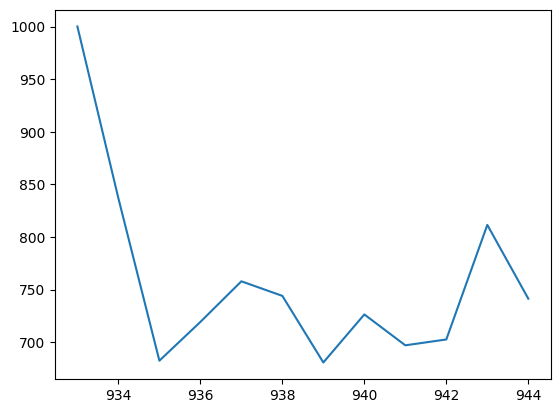

In [124]:
data_d[data_d["TCUID"] == 42790]["Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)"].plot()

In [125]:
data_d["GICS Industry Name"].unique()

array(['Banks', 'Diversified Telecommunication Services',
       'Containers & Packaging', 'Insurance',
       'Diversified Financial Services', 'Metals & Mining',
       'Food & Staples Retailing', 'Beverages', 'Capital Markets',
       'Building Products', 'Industrial Conglomerates',
       'Multiline Retail', 'Oil, Gas & Consumable Fuels', 'Chemicals',
       'Distributors', 'Pharmaceuticals', 'Leisure Products',
       'Health Care Technology',
       'Electronic Equipment, Instruments & Components',
       'Commercial Services & Supplies', 'Machinery',
       'Textiles, Apparel & Luxury Goods', 'Energy Equipment & Services',
       'Food Products', 'Professional Services', 'Construction Materials',
       'Independent Power and Renewable Electricity Producers',
       'Personal Products', 'Electric Utilities', 'Auto Components',
       'Air Freight & Logistics', 'Health Care Equipment & Supplies',
       'Health Care Providers & Services', 'Household Products',
       'Semiconduct

<AxesSubplot:xlabel='Financial Year'>

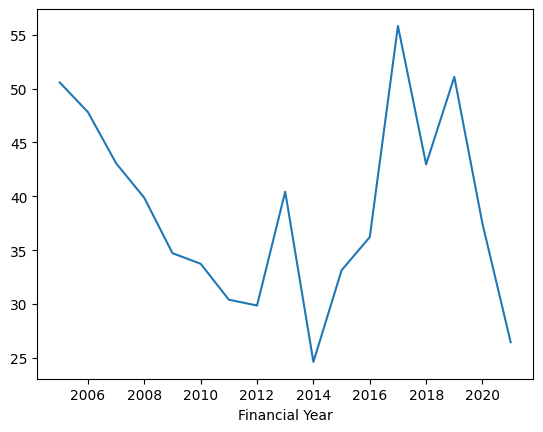

In [126]:
import matplotlib.pyplot as plt
data_d[data_d["GICS Industry Name"] == "Auto Components"].groupby("Financial Year").mean()["Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)"].plot()
# plt.ylim(0,10)

In [127]:
data_d[data_d["GICS Industry Name"] == "Airlines"]

TCUID                              Company  Financial Year  \
933      42790                Deutsche Lufthansa AG            2005   
934      42790                Deutsche Lufthansa AG            2006   
935      42790                Deutsche Lufthansa AG            2007   
936      42790                Deutsche Lufthansa AG            2008   
937      42790                Deutsche Lufthansa AG            2009   
...        ...                                  ...             ...   
126310  238947                United Airlines, Inc.            2008   
126311  238947                United Airlines, Inc.            2009   
126312  238947                United Airlines, Inc.            2010   
130047  246977             Blade Air Mobility, Inc.            2020   
130802  247783  Sun Country Airlines Holdings, Inc.            2020   

       GICS Sector Name GICS Industry Group Name GICS Industry Name  \
933         Industrials           Transportation           Airlines   
934         Industrials           Transportation           Airlines   
935         Industrials           Transportation           Airlines   
936         Industrials           Transportation           Airlines   
937         Industrials           Transportation           Airlines   
...                 ...                      ...                ...   
126310      Industrials           Transportation           Airlines   
126311      Industrials           Transportation           Airlines   
126312      Industrials           Transportation           Airlines   
130047      Industrials           Transportation           Airlines   
130802      Industrials           Transportation           Airlines   

       GICS Sub Industry Name        Country  Carbon-Scope 1 (tonnes CO2e)  \
933                  Airlines        GERMANY                  2.131192e+07   
934                  Airlines        GERMANY                  2.191239e+07   
935                  Airlines        GERMANY                  2.233358e+07   
936                  Airlines        GERMANY                  2.491131e+07   
937                  Airlines        GERMANY                  2.422813e+07   
...                       ...            ...                           ...   
126310               Airlines  UNITED STATES                  1.460846e+07   
126311               Airlines  UNITED STATES                  1.360269e+07   
126312               Airlines  UNITED STATES                  3.304842e+07   
130047               Airlines  UNITED STATES                  2.588187e+04   
130802               Airlines  UNITED STATES                  4.434244e+05   

        Carbon-Scope 2 (tonnes CO2e)  Carbon-Scope 3 (tonnes CO2e)  \
933                    247502.906887                  3.680010e+06   
934                    441421.620000                  3.514833e+06   
935                    311466.640191                  4.646262e+06   
936                    289408.260225                  4.033292e+06   
937                    305946.990000                  4.344723e+06   
...                              ...                           ...   
126310                  43464.097978                  1.763620e+06   
126311                  35602.182125                  1.723297e+06   
126312                 235277.000000                  2.868773e+06   
130047                     63.991000                  3.073151e+03   
130802                   1096.332000                  5.265114e+04   

        Carbon-Direct (tonnes CO2e)  Carbon-First Tier Indirect (tonnes CO2e)  \
933                    2.131192e+07                              1.356169e+06   
934                    2.191239e+07                              1.242306e+06   
935                    2.233358e+07                              1.692901e+06   
936                    2.491131e+07                              1.531094e+06   
937                    2.422813e+07                              1.611937e+06   
...                             ...    

In [128]:
data_d[data_d["GICS Industry Name"] == "Auto Components"].groupby("Financial Year").count()

TCUID  Company  GICS Sector Name  GICS Industry Group Name  \
Financial Year                                                               
2005               40       40                40                        40   
2006               54       54                54                        54   
2007               57       57                57                        57   
2008               58       58                58                        58   
2009               68       68                68                        68   
2010               72       72                72                        72   
2011               76       76                76                        76   
2012               84       84                84                        84   
2013              113      113               113                       113   
2014              125      125               125                       125   
2015               95       95                95                        95   
2016              257      257               257                       257   
2017              276      276               276                       276   
2018              286      286               286                       286   
2019              296      296               296                       296   
2020              328      328               328                       328   
2021               67       67                67                        67   

                GICS Industry Name  GICS Sub Industry Name  Country  \
Financial Year                                                        
2005                            40                      40       40   
2006                            54                      54       54   
2007                            57                      57       57   
2008                            58                      58       58   
2009                            68                      68       68   
2010                            72                      72       72   
2011                            76                      76       76   
2012                            84                      84       84   
2013                           113                     113      113   
2014                           125                     125      125   
2015                            95                      95       95   
2016                           257                     257      257   
2017                           276                     276      276   
2018                           286                     286      286   
2019                           296                     296      296   
2020                           328                     328      328   
2021                            67                      67       67   

                Carbon-Scope 1 (tonnes CO2e)  Carbon-Scope 2 (tonnes CO2e)  \
Financial Year                                                               
2005                                      40                            40   
2006                                      54                            54   
2007                                      57                            57   
2008                                      58                            58   
2009                                      68                            68   
2010                                      72                            72   
2011                                      76                            76   
2012                                      84                            84   
2013                                     113                           113   
2014                                     125                           125   
2015                                      95                            95   
2016                                     257                           257   
2017                                     276                           276   
2018         

In [129]:
tmp = (data_d[(data_d["GICS Industry Name"] == "Auto Components") & (data_d["Financial Year"] == 2005)]["TCUID"]).to_list()

In [130]:
data.set_index("TCUID", inplace=True)

In [131]:
data

Company          ISIN  Financial Year  \
TCUID                                                               
42694           Erste Group Bank AG  AT0000652011            2005   
42694           Erste Group Bank AG  AT0000652011            2006   
42694           Erste Group Bank AG  AT0000652011            2007   
42694           Erste Group Bank AG  AT0000652011            2008   
42694           Erste Group Bank AG  AT0000652011            2009   
...                             ...           ...             ...   
248219          Sylvamo Corporation  US8713321029            2020   
248243  Apartment Income REIT Corp.  US03750L1098            2020   
248356                   Cogelec SA  FR0013335742            2020   
248357        Global Bioenergies SA  FR0011052257            2020   
248357        Global Bioenergies SA  FR0011052257            2021   

        GICS Sector Code        GICS Sector Name  GICS Industry Group Code  \
TCUID                                                                        
42694               40.0              Financials                    4010.0   
42694               40.0              Financials                    4010.0   
42694               40.0              Financials                    4010.0   
42694               40.0              Financials                    4010.0   
42694               40.0              Financials                    4010.0   
...                  ...                     ...                       ...   
248219              15.0               Materials                    1510.0   
248243              60.0             Real Estate                    6010.0   
248356              45.0  Information Technology                    4520.0   
248357              15.0               Materials                    1510.0   
248357              15.0               Materials                    1510.0   

               GICS Industry Group Name  GICS Industry Code  \
TCUID                                                         
42694                             Banks            401010.0   
42694                             Banks            401010.0   
42694                             Banks            401010.0   
42694                             Banks            401010.0   
42694                             Banks            401010.0   
...                                 ...                 ...   
248219                        Materials            151050.0   
248243                      Real Estate            601010.0   
248356  Technology Hardware & Equipment            452010.0   
248357                        Materials            151010.0   
248357                        Materials            151010.0   

                                  GICS Industry Name  GICS Sub Industry Code  \
TCUID                                                                          
42694                                          Banks              40101010.0   
42694                                          Banks              40101010.0   
42694                                          Banks              40101010.0   
42694                                          Banks              40101010.0   
42694                                          Banks              40101010.0   
...                                              ...                     ...   
248219                       Paper & Forest Products              15105020.0   
248243  Equity Real Estate Investment Trusts (REITs)              60101060.0   
248356                      Communications Equipment              45201020.0   
248357                                     Chemicals              15101010.0   
248357                                     Chemicals              15101010.0   

          GICS Sub Industry Name  \
TCUID                              
42694          Diversified Banks   
42694          Diversified Banks   
42694          Diversified Banks   
42694          Diversified Banks   
42694          Diversified Banks   
..

In [132]:
data_d=data.loc[tmp]

In [133]:
data_d["Carbon Disclosure"] == "Estimated data"

TCUID
42766     True
42766     True
42766     True
42766    False
42766    False
         ...  
84327     True
84327     True
84327     True
84327     True
84327    False
Name: Carbon Disclosure, Length: 588, dtype: bool

<AxesSubplot:xlabel='Financial Year'>

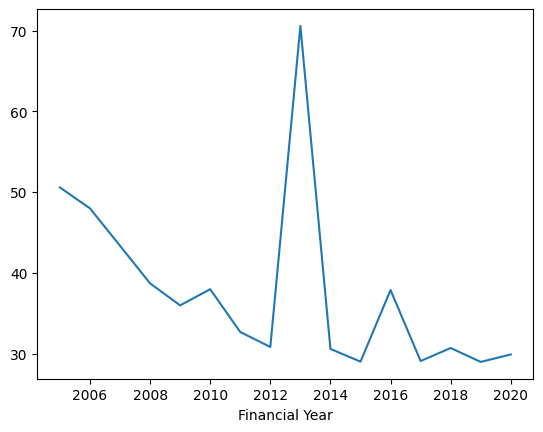

In [134]:
data_d[data_d["GICS Industry Name"] == "Auto Components"].groupby("Financial Year").mean()["Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)"].plot()

<AxesSubplot:xlabel='Financial Year'>

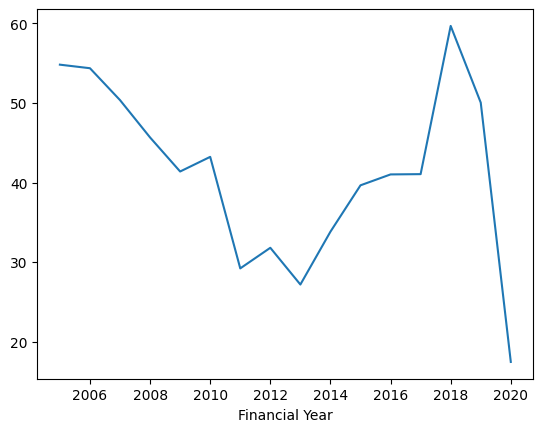

In [135]:
data_d[(data_d["GICS Industry Name"] == "Auto Components") & (data_d["Carbon Disclosure"] == "Estimated data")].groupby("Financial Year").mean()["Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)"].plot()

<AxesSubplot:xlabel='Financial Year'>

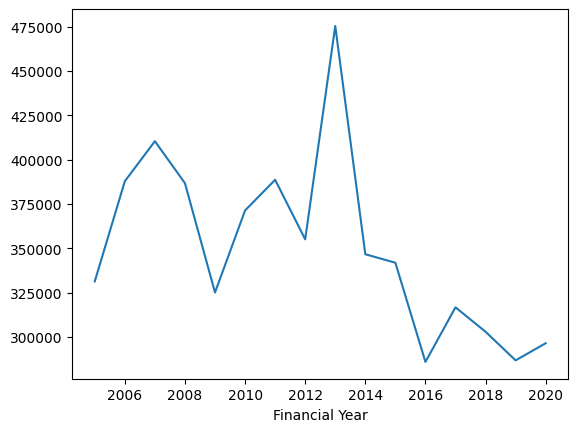

In [136]:
data_d[data_d["GICS Industry Name"] == "Auto Components"].groupby("Financial Year").mean()["Carbon-Direct (tonnes CO2e)"].plot()

In [137]:
data_d.head(2)

Company          ISIN  Financial Year  \
TCUID                                                                 
42766  Continental Aktiengesellschaft  DE0005439004            2005   
42766  Continental Aktiengesellschaft  DE0005439004            2006   

       GICS Sector Code        GICS Sector Name  GICS Industry Group Code  \
TCUID                                                                       
42766              25.0  Consumer Discretionary                    2510.0   
42766              25.0  Consumer Discretionary                    2510.0   

       GICS Industry Group Name  GICS Industry Code GICS Industry Name  \
TCUID                                                                    
42766  Automobiles & Components            251010.0    Auto Components   
42766  Automobiles & Components            251010.0    Auto Components   

       GICS Sub Industry Code GICS Sub Industry Name  \
TCUID                                                  
42766              25101020.0         Tires & Rubber   
42766              25101020.0         Tires & Rubber   

                         GICS Description                Trucost Sector Name  \
TCUID                                                                          
42766  Manufacturers of tires and rubber.  Motor vehicle parts manufacturing   
42766  Manufacturers of tires and rubber.  Motor vehicle parts manufacturing   

      Trucost Sector  Country  Carbon-Scope 1 (tonnes CO2e)  \
TCUID                                                         
42766         336300  GERMANY                  8.788821e+05   
42766         336300  GERMANY                  1.005393e+06   

       Carbon-Scope 2 (tonnes CO2e)  Carbon-Scope 3 (tonnes CO2e)  \
TCUID                                                               
42766                 654788.624969                  7.807637e+06   
42766                 736365.574151                  8.494345e+06   

       Carbon-Direct (tonnes CO2e)  Carbon-First Tier Indirect (tonnes CO2e)  \
TCUID                                                                          
42766                 8.789854e+05                              3.566575e+06   
42766                 1.005518e+06                              3.916489e+06   

       Carbon-Direct+First Tier Indirect (tonnes CO2e)  \
TCUID                                                    
42766                                     4.445560e+06   
42766                                     4.922007e+06   

       Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)  \
TCUID                                                  
42766                                      53.846241   
42766                                      51.216003   

       Carbon Intensity-Scope 2 (tonnes CO2e/USD mn)  \
TCUID                                                  
42766                                      40.116764   
42766                                      37.511411   

       Carbon Intensity-Scope 3 (tonnes CO2e/USD mn)  \
TCUID                                                  
42766                                     478.348431   
42766                                     432.712867   

       Carbon Intensity-Direct (tonnes CO2e/USD mn)  \
TCUID                                                 
42766                                     53.852570   
42766                                     51.222384   

       Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn)  \
TCUID                                                              
42766                                         218.512402           
42766                                         199.510984           

       Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn)  \
TCUID                                                                     
42766                                         272.364972                  
42766                                         250.733368                  

       GHG-Direct (USD mn)  GHG-Indirec

In [138]:
data

Company          ISIN  Financial Year  \
TCUID                                                               
42694           Erste Group Bank AG  AT0000652011            2005   
42694           Erste Group Bank AG  AT0000652011            2006   
42694           Erste Group Bank AG  AT0000652011            2007   
42694           Erste Group Bank AG  AT0000652011            2008   
42694           Erste Group Bank AG  AT0000652011            2009   
...                             ...           ...             ...   
248219          Sylvamo Corporation  US8713321029            2020   
248243  Apartment Income REIT Corp.  US03750L1098            2020   
248356                   Cogelec SA  FR0013335742            2020   
248357        Global Bioenergies SA  FR0011052257            2020   
248357        Global Bioenergies SA  FR0011052257            2021   

        GICS Sector Code        GICS Sector Name  GICS Industry Group Code  \
TCUID                                                                        
42694               40.0              Financials                    4010.0   
42694               40.0              Financials                    4010.0   
42694               40.0              Financials                    4010.0   
42694               40.0              Financials                    4010.0   
42694               40.0              Financials                    4010.0   
...                  ...                     ...                       ...   
248219              15.0               Materials                    1510.0   
248243              60.0             Real Estate                    6010.0   
248356              45.0  Information Technology                    4520.0   
248357              15.0               Materials                    1510.0   
248357              15.0               Materials                    1510.0   

               GICS Industry Group Name  GICS Industry Code  \
TCUID                                                         
42694                             Banks            401010.0   
42694                             Banks            401010.0   
42694                             Banks            401010.0   
42694                             Banks            401010.0   
42694                             Banks            401010.0   
...                                 ...                 ...   
248219                        Materials            151050.0   
248243                      Real Estate            601010.0   
248356  Technology Hardware & Equipment            452010.0   
248357                        Materials            151010.0   
248357                        Materials            151010.0   

                                  GICS Industry Name  GICS Sub Industry Code  \
TCUID                                                                          
42694                                          Banks              40101010.0   
42694                                          Banks              40101010.0   
42694                                          Banks              40101010.0   
42694                                          Banks              40101010.0   
42694                                          Banks              40101010.0   
...                                              ...                     ...   
248219                       Paper & Forest Products              15105020.0   
248243  Equity Real Estate Investment Trusts (REITs)              60101060.0   
248356                      Communications Equipment              45201020.0   
248357                                     Chemicals              15101010.0   
248357                                     Chemicals              15101010.0   

          GICS Sub Industry Name  \
TCUID                              
42694          Diversified Banks   
42694          Diversified Banks   
42694          Diversified Banks   
42694          Diversified Banks   
42694          Diversified Banks   
..

In [139]:
!pwd

/Users/nadirgmira/code/carbon-forecast/notebooks


In [140]:
!pwd

/Users/nadirgmira/code/carbon-forecast/notebooks


In [141]:
import pandas as pd
dg=pd.read_csv("/Users/nadirgmira/code/carbon-forecast/raw_data/all_features_with_sectorrev.csv")

In [142]:
dg.head(4)

Unnamed: 0                                       company_name     TCUID  \
0           0  "Bank "Saint-Petersburg" Public Joint-Stock Co...  185037.0   
1           1                   &Do Holdings Co.,Ltd. (TSE:3457)  236994.0   
2           2                                  1&1 AG (XTRA:1U1)  185334.0   
3           3                          1000mercis (ENXTPA:ALMIL)  203522.0   

     MI_ID  intensity_scope1_CY2021  intensity_scope1_CY2020  \
0  4238385                      NaN                    0.738   
1  4984797                      NaN                   13.058   
2  8169504                      NaN                    5.241   
3  4989826                      NaN                    7.519   

   intensity_scope1_CY2019  intensity_scope1_CY2018  intensity_scope1_CY2017  \
0                 0.791709                 0.857311                 0.944439   
1                13.519254                14.117776                15.440240   
2                 5.293000                 5.290000                      NaN   
3                 7.546698                 7.510652                 7.621000   

   intensity_scope1_CY2016  intensity_scope1_CY2015  intensity_scope1_CY2014  \
0                      NaN                      NaN                      NaN   
1                      NaN                      NaN                      NaN   
2                      NaN                      NaN                      NaN   
3                 7.669379                 7.814625                 7.755381   

   intensity_scope1_CY2013  intensity_scope1_CY2012  intensity_scope1_CY2011  \
0                      NaN                      NaN                      NaN   
1                      NaN                      NaN                      NaN   
2                      NaN                      NaN                      NaN   
3                 7.653815                      NaN                      NaN   

   intensity_scope1_CY2010  disclosureCY0  disclosureCY2021  disclosureCY2020  \
0                      NaN            0.0               NaN               0.0   
1                      NaN            0.0               NaN               0.0   
2                      NaN            0.0               NaN               0.0   
3                      NaN            0.0               NaN               0.0   

   disclosureCY2019  disclosureCY2018  disclosureCY2017  disclosureCY2016  \
0               0.0               0.0               0.0               NaN   
1               0.0               0.0               0.0               NaN   
2               0.0               0.0               NaN               NaN   
3               0.0               0.0               0.0               0.0   

   disclosureCY2015  disclosureCY2014  disclosureCY2013  disclosureCY2012  \
0               NaN               NaN               NaN               NaN   
1               NaN               NaN               NaN               NaN   
2               NaN               NaN               NaN               NaN   
3               0.0               0.0               0.0               NaN   

   disclosureCY2011  disclosureCY2010                  Sector  \
0               NaN               NaN              Financials   
1               NaN               NaN  Consumer Discretionary   
2               NaN               NaN  Communication Services   
3               NaN               NaN  Communication Services   

                  Industry Group                             Industry  \
0                          Banks                                Banks   
1  Consumer Durables and Apparel                   Household Durables   
2     Telecommunication Services  Wireless Telecommunication Services   
3        Media and Entertainment                                Media   

                      Primary Industry Country / Region Name  \
0                    Diversified Banks                Russia   
1                         Homebuilding                 Japan   
2  Wireless Telecommunicat

In [355]:
dg.columns.tolist()

['Unnamed: 0',
 'company_name',
 'TCUID',
 'MI_ID',
 'intensity_scope1_CY2021',
 'intensity_scope1_CY2020',
 'intensity_scope1_CY2019',
 'intensity_scope1_CY2018',
 'intensity_scope1_CY2017',
 'intensity_scope1_CY2016',
 'intensity_scope1_CY2015',
 'intensity_scope1_CY2014',
 'intensity_scope1_CY2013',
 'intensity_scope1_CY2012',
 'intensity_scope1_CY2011',
 'intensity_scope1_CY2010',
 'disclosureCY0',
 'disclosureCY2021',
 'disclosureCY2020',
 'disclosureCY2019',
 'disclosureCY2018',
 'disclosureCY2017',
 'disclosureCY2016',
 'disclosureCY2015',
 'disclosureCY2014',
 'disclosureCY2013',
 'disclosureCY2012',
 'disclosureCY2011',
 'disclosureCY2010',
 'Sector',
 'Industry Group',
 'Industry',
 'Primary Industry',
 'Country / Region Name',
 'S&P Credit Rating',
 'Full Time Employees\n(actual)',
 'Total Enterprise Value (CIQ)\n($M)',
 'revenueCY0',
 'revenueCY2021',
 'revenueCY2020',
 'revenueCY2019',
 'revenueCY2018',
 'revenueCY2017',
 'revenueCY2016',
 'revenueCY2015',
 'revenueCY2014'

In [143]:
import os
os.listdir("/Users/nadirgmira/code/carbon-forecast/raw_data")

['all_features_with_sectorrev.csv',
 '.DS_Store',
 'Renewable_energy.xlsx',
 'Coal_expansion.xlsx',
 'Forecasted_data_based_on_target.xlsx',
 'Historical_Emissions_simp.csv',
 'All_features_v2.xlsx',
 'SectorRev.csv',
 'DS_Store',
 'Fossil_Fuel_Energy_Mix.csv',
 'All_features.xlsx',
 'for_TF.csv',
 'EU_taxonomy_data.csv',
 'Historical_Emissions.csv',
 'for_RNN_energy.csv',
 'Climate_Strategy_Scores.xlsx',
 'Data Map.docx',
 'Carbon_budget.xlsx']

In [218]:
lst=[]
dt=pd.read_csv("/Users/nadirgmira/code/carbon-forecast/raw_data/Historical_Emissions.csv")
dt

TCUID                      Company          ISIN  Financial Year  \
0        42694          Erste Group Bank AG  AT0000652011            2005   
1        42694          Erste Group Bank AG  AT0000652011            2006   
2        42694          Erste Group Bank AG  AT0000652011            2007   
3        42694          Erste Group Bank AG  AT0000652011            2008   
4        42694          Erste Group Bank AG  AT0000652011            2009   
...        ...                          ...           ...             ...   
131056  248219          Sylvamo Corporation  US8713321029            2020   
131057  248243  Apartment Income REIT Corp.  US03750L1098            2020   
131058  248356                   Cogelec SA  FR0013335742            2020   
131059  248357        Global Bioenergies SA  FR0011052257            2020   
131060  248357        Global Bioenergies SA  FR0011052257            2021   

        GICS Sector Code        GICS Sector Name  GICS Industry Group Code  \
0                   40.0              Financials                    4010.0   
1                   40.0              Financials                    4010.0   
2                   40.0              Financials                    4010.0   
3                   40.0              Financials                    4010.0   
4                   40.0              Financials                    4010.0   
...                  ...                     ...                       ...   
131056              15.0               Materials                    1510.0   
131057              60.0             Real Estate                    6010.0   
131058              45.0  Information Technology                    4520.0   
131059              15.0               Materials                    1510.0   
131060              15.0               Materials                    1510.0   

               GICS Industry Group Name  GICS Industry Code  \
0                                 Banks            401010.0   
1                                 Banks            401010.0   
2                                 Banks            401010.0   
3                                 Banks            401010.0   
4                                 Banks            401010.0   
...                                 ...                 ...   
131056                        Materials            151050.0   
131057                      Real Estate            601010.0   
131058  Technology Hardware & Equipment            452010.0   
131059                        Materials            151010.0   
131060                        Materials            151010.0   

                                  GICS Industry Name  GICS Sub Industry Code  \
0                                              Banks              40101010.0   
1                                              Banks              40101010.0   
2                                              Banks              40101010.0   
3                                              Banks              40101010.0   
4                                              Banks              40101010.0   
...                                              ...                     ...   
131056                       Paper & Forest Products              15105020.0   
131057  Equity Real Estate Investment Trusts (REITs)              60101060.0   
131058                      Communications Equipment              45201020.0   
131059                                     Chemicals              15101010.0   
131060                                     Chemicals              15101010.0   

          GICS Sub Industry Name  \
0              Diversified Banks   
1              Diversified Banks   
2              Diversified Banks   
3              Diversified Banks   
4              Diversified Banks   
...                          ...   
131056            Paper Products   
131057         Residential REITs   
131058  Communications Equipment   
131059       Commodity Chemicals   
131060       Commodity Chemicals 

In [221]:
dt['Carbon Intensity(tonnes CO2e/USD mn)']=dt['Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)']+dt['Carbon Intensity-Scope 2 (tonnes CO2e/USD mn)']
                                                                              
dt['Carbon(tonnes CO2e)']=dt['Carbon-Scope 1 (tonnes CO2e)']+dt['Carbon-Scope 2 (tonnes CO2e)']
                                                                                                  
df=dt[['TCUID','Company','Financial Year','GICS Industry Name','Carbon Intensity(tonnes CO2e/USD mn)','Carbon(tonnes CO2e)']]                                                                                                 

df.set_index(['TCUID','Company','GICS Industry Name','Financial Year'],inplace=True)

                

In [222]:
df.head(5)

Carbon Intensity(tonnes CO2e/USD mn)  \
TCUID Company             GICS Industry Name Financial Year                                         
42694 Erste Group Bank AG Banks              2005                                        2.555870   
                                             2006                                        2.444571   
                                             2007                                        2.338714   
                                             2008                                        3.119432   
                                             2009                                        8.015415   

                                                             Carbon(tonnes CO2e)  
TCUID Company             GICS Industry Name Financial Year                       
42694 Erste Group Bank AG Banks              2005                   14410.379463  
                                             2006                   23458.582345  
                                             2007                   21133.109865  
                                             2008                   30407.536328  
                                             2009                   93451.076912

In [145]:
di=pd.read_csv("/Users/nadirgmira/code/carbon-forecast/raw_data/SectorRev.csv")

In [147]:
di.columns.tolist()

['TCUID',
 'Company',
 'ISIN',
 'Financial Year',
 'GICS Sector Code',
 'GICS Sector Name',
 'GICS Industry Group Code',
 'GICS Industry Group Name',
 'GICS Industry Code',
 'GICS Industry Name',
 'GICS Sub Industry Code',
 'GICS Sub Industry Name',
 'GICS Description',
 'Country',
 'Trucost Sector Name',
 'Trucost Sector',
 'Trucost Sector Revenue (USD mn)',
 'Trucost Sector Revenue Percentage (%)',
 'FigureRestate',
 'EffectiveDate']

In [148]:

import pandas as pd
dz=pd.read_excel("/Users/nadirgmira/code/carbon-forecast/raw_data/Climate_Strategy_Scores.xlsx")
dz.head(3)

Company Name    MI ID     TCUID  \
0   &Do Holdings Co.,Ltd. (TSE:3457)  4984797  236994.0   
1                  1&1 AG (XTRA:1U1)  8169504  185334.0   
2  10x Genomics, Inc. (NASDAQGS:TXG)  5248867  244864.0   

                       Industry (SAM)  Climate Strategy Score  
0                    HOM Homebuilding                     0.0  
1      TLS Telecommunication Services                    14.0  
2  LIF Life Sciences Tools & Services                     0.0

In [149]:
dz=pd.read_csv("/Users/nadirgmira/code/carbon-forecast/raw_data/all_features_with_sectorrev.csv")
dz.columns.tolist()

['Unnamed: 0',
 'company_name',
 'TCUID',
 'MI_ID',
 'intensity_scope1_CY2021',
 'intensity_scope1_CY2020',
 'intensity_scope1_CY2019',
 'intensity_scope1_CY2018',
 'intensity_scope1_CY2017',
 'intensity_scope1_CY2016',
 'intensity_scope1_CY2015',
 'intensity_scope1_CY2014',
 'intensity_scope1_CY2013',
 'intensity_scope1_CY2012',
 'intensity_scope1_CY2011',
 'intensity_scope1_CY2010',
 'disclosureCY0',
 'disclosureCY2021',
 'disclosureCY2020',
 'disclosureCY2019',
 'disclosureCY2018',
 'disclosureCY2017',
 'disclosureCY2016',
 'disclosureCY2015',
 'disclosureCY2014',
 'disclosureCY2013',
 'disclosureCY2012',
 'disclosureCY2011',
 'disclosureCY2010',
 'Sector',
 'Industry Group',
 'Industry',
 'Primary Industry',
 'Country / Region Name',
 'S&P Credit Rating',
 'Full Time Employees\n(actual)',
 'Total Enterprise Value (CIQ)\n($M)',
 'revenueCY0',
 'revenueCY2021',
 'revenueCY2020',
 'revenueCY2019',
 'revenueCY2018',
 'revenueCY2017',
 'revenueCY2016',
 'revenueCY2015',
 'revenueCY2014'

In [150]:
dpiv=dz[['TCUID','climate_strategy_scoreFY2022',
 'climate_strategy_scoreFY2021',
 'climate_strategy_scoreFY2020',
 'climate_strategy_scoreFY2019',
 'climate_strategy_scoreFY2018',
 'climate_strategy_scoreFY2017',
 'climate_strategy_scoreFY2016',
 'climate_strategy_scoreFY2015',
 'climate_strategy_scoreFY2014',
 'climate_strategy_scoreFY2013']]

In [151]:
dpiv.columns= ['TCUID']+[int(k.strip("climate_strategy_scoreFY"))for k in dpiv.columns if "climate_strategy_scoreFY" in k]


In [152]:
list(dpiv.columns)

['TCUID', 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013]

In [154]:
ls=dpiv.columns.drop('TCUID')
# tuples=list(zip(dpiv['TCUID'],ls)
# tuples
pd.MultiIndex.from_product([dpiv['TCUID'],ls], names=["TCUID", "Years"])

MultiIndex([(185037.0, 2022),
            (185037.0, 2021),
            (185037.0, 2020),
            (185037.0, 2019),
            (185037.0, 2018),
            (185037.0, 2017),
            (185037.0, 2016),
            (185037.0, 2015),
            (185037.0, 2014),
            (185037.0, 2013),
            ...
            (239643.0, 2022),
            (239643.0, 2021),
            (239643.0, 2020),
            (239643.0, 2019),
            (239643.0, 2018),
            (239643.0, 2017),
            (239643.0, 2016),
            (239643.0, 2015),
            (239643.0, 2014),
            (239643.0, 2013)],
           names=['TCUID', 'Years'], length=166470)

In [155]:
dpiv.set_index('TCUID',inplace=True)



In [339]:
dpiv.loc[44427]

2022     NaN
2021    54.0
2020    22.0
2019    45.0
2018    45.0
2017    61.0
2016    63.0
2015    59.0
2014    48.0
2013    58.0
Name: 44427.0, dtype: float64

In [156]:
dpiv.columns[0]

2022

In [157]:
dpiv.isna().sum()

2022    16647
2021     6285
2020     7916
2019    10327
2018    12448
2017    13431
2016    13938
2015    14118
2014    14780
2013    14798
dtype: int64

Create and populate multiindex dataframe

In [159]:
import itertools
dpiv_1=pd.DataFrame(index=pd.MultiIndex.from_product([dpiv.index,dpiv.columns], names=["TCUID", "Years"]),columns=['Climate Score'])

for k, l in itertools.product(list(dpiv.index),list(dpiv.columns)):
    dpiv_1.loc[(k,l),dpiv_1.columns[0]]=dpiv.loc[k,l]

dpiv_1
# dpiv_1=pd.pivot_table(dpiv,index=list(dpiv.columns),values=ls)
# dpiv_1

Climate Score
TCUID    Years              
185037.0 2022            NaN
         2021            NaN
         2020            NaN
         2019            NaN
         2018            NaN
...                      ...
239643.0 2017            NaN
         2016            NaN
         2015            NaN
         2014            NaN
         2013            NaN

[166470 rows x 1 columns]

In [286]:
# df.xs("one", level="second", axis=1)
# df.loc[:, (slice(None), "one")]

l=2018

dpiv_na=dpiv_1.dropna()[dpiv_na['Climate Score']>0]

dpiv_na=dpiv_1.dropna()

dpiv_na.xs(l, level="Years")['Climate Score'].value_counts()/dpiv_na.xs(l, level="Years")['Climate Score'].value_counts().sum()

# dpiv_1.loc[(slice(None),2019),:]
# dpiv_1.xs("one", level="second", axis=1)

0.0     0.584425
3.0     0.016194
4.0     0.011669
96.0    0.008335
67.0    0.007621
          ...   
98.0    0.001429
5.0     0.001429
11.0    0.001191
1.0     0.000953
97.0    0.000476
Name: Climate Score, Length: 101, dtype: float64

In [288]:
dpiv_na.xs(l, level="Years")

Climate Score
TCUID                 
185334.0           0.0
238050.0           0.0
230557.0           0.0
184855.0           0.0
43243.0           43.0
...                ...
52191.0            0.0
228744.0           0.0
44471.0           81.0
191075.0           0.0
135872.0           0.0

[4199 rows x 1 columns]

Rename multiindex Indices

In [236]:
df.index.set_names(['TCUID', 'Company', 'GICS Industry Name','Year'],inplace=True)

In [241]:
dpiv_na.index.set_names(['TCUID','Year'],inplace=True)

Merge two dataframes on index

In [244]:
d_res=df.join(dpiv_na,on=dpiv_na.index.names,how='inner')

How to access a list of values of level of an Index


In [258]:
d_res.index.get_level_values('GICS Industry Name').unique()

Index(['Banks', 'Diversified Telecommunication Services',
       'Containers & Packaging', 'Diversified Financial Services',
       'Metals & Mining', 'Food & Staples Retailing', 'Insurance',
       'Capital Markets', 'Multiline Retail', 'Oil, Gas & Consumable Fuels',
       'Chemicals', 'Pharmaceuticals',
       'Electronic Equipment, Instruments & Components', 'Machinery',
       'Building Products', 'Food Products', 'Professional Services',
       'Construction Materials',
       'Independent Power and Renewable Electricity Producers',
       'Textiles, Apparel & Luxury Goods', 'Personal Products',
       'Auto Components', 'Air Freight & Logistics',
       'Health Care Providers & Services', 'Household Products',
       'Semiconductors & Semiconductor Equipment', 'Automobiles', 'Software',
       'Industrial Conglomerates', 'Airlines', 'Marine', 'Gas Utilities',
       'Electric Utilities', 'Specialty Retail',
       'Hotels, Restaurants & Leisure', 'IT Services',
       'Paper & F

access a value in a multiindex dataframe

In [292]:
ls=(d_res.xs('Oil, Gas & Consumable Fuels', level='GICS Industry Name').
        index.get_level_values('Company').unique())

ls

Index(['Woodside Energy Group Ltd', 'China Petroleum & Chemical Corporation',
       'PetroChina Company Limited', 'Tullow Oil plc', 'Capricorn Energy PLC',
       'Eni S.p.A.', 'Snam S.p.A.', 'Equinor ASA',
       'PTT Public Company Limited', 'APA Corporation',
       ...
       'Parex Resources Inc.', 'PXP Energy Corporation',
       'Bangchak Corporation Public Company Limited',
       'PrairieSky Royalty Ltd.', 'Gaztransport & Technigaz SA',
       'Energy Absolute Public Company Limited', 'Aker BP ASA',
       'Canacol Energy Ltd', 'International Petroleum Corporation',
       'CONSOL Energy Inc.'],
      dtype='object', name='Company', length=108)

Vectorized string search

In [280]:
ls[ls.str.contains('Total')]

Index(['TotalEnergies SE'], dtype='object', name='Company')

In [296]:

test=d_res.xs('TotalEnergies SE',level='Company')
test

Carbon Intensity(tonnes CO2e/USD mn)  \
TCUID GICS Industry Name          Year                                         
44518 Oil, Gas & Consumable Fuels 2013                            200.223716   
                                  2014                            205.279907   
                                  2015                            276.688800   
                                  2016                            289.829908   
                                  2017                            234.736300   
                                  2018                            212.318266   
                                  2019                            222.175000   
                                  2020                            320.470000   

                                        Carbon(tonnes CO2e) Climate Score  
TCUID GICS Industry Name          Year                                     
44518 Oil, Gas & Consumable Fuels 2013         5.038365e+07          70.0  
                                  2014         4.847110e+07          67.0  
                                  2015         4.575243e+07          68.0  
                                  2016         4.340000e+07          83.0  
                                  2017         4.025563e+07          91.0  
                                  2018         4.445159e+07          94.0  
                                  2019         4.450526e+07          94.0  
                                  2020         3.836148e+07          94.0

In [311]:
d_res.index.get_level_values('Company')

Index(['Erste Group Bank AG', 'Erste Group Bank AG', 'Erste Group Bank AG',
       'Erste Group Bank AG', 'Telekom Austria AG', 'Telekom Austria AG',
       'Telekom Austria AG', 'Telekom Austria AG', 'Amcor plc', 'Amcor plc',
       ...
       'Lundin Gold Inc.', 'Metso Outotec Oyj', 'Atlantic Sapphire ASA',
       'Cibus Nordic Real Estate AB (publ)', 'DraftKings Inc.',
       'Grenergy Renovables, S.A.', 'SIMPAR S.A.', 'TIM S.A.',
       'Pop Mart International Group Limited', 'Van Lanschot Kempen NV'],
      dtype='object', name='Company', length=12110)

In [316]:
def identity(s):
    ls=d_res.index.get_level_values('Company')
    company=ls[ls.str.contains(s)]
    return d_res.xs(company[0],level='Company')

In [344]:
dg_test=identity('BP p.l.c')
dg_test

Carbon Intensity(tonnes CO2e/USD mn)  \
TCUID GICS Industry Name          Year                                         
44427 Oil, Gas & Consumable Fuels 2013                            147.197581   
                                  2014                            156.349160   
                                  2015                            250.510335   
                                  2016                            307.826741   
                                  2017                            225.168616   
                                  2018                            173.864735   
                                  2019                            196.496293   
                                  2020                            253.182000   

                                        Carbon(tonnes CO2e) Climate Score  
TCUID GICS Industry Name          Year                                     
44427 Oil, Gas & Consumable Fuels 2013         5.580790e+07          58.0  
                                  2014         5.528006e+07          48.0  
                                  2015         5.583725e+07          59.0  
                                  2016         5.633476e+07          63.0  
                                  2017         5.408730e+07          61.0  
                                  2018         5.194313e+07          45.0  
                                  2019         5.440000e+07          45.0  
                                  2020         4.548942e+07          22.0

In [345]:
test=identity('BP p.l.c')
df_test=test.reset_index().drop(columns=['TCUID','GICS Industry Name']).set_index('Year')
df_test

Carbon Intensity(tonnes CO2e/USD mn)  Carbon(tonnes CO2e) Climate Score
Year                                                                         
2013                            147.197581         5.580790e+07          58.0
2014                            156.349160         5.528006e+07          48.0
2015                            250.510335         5.583725e+07          59.0
2016                            307.826741         5.633476e+07          63.0
2017                            225.168616         5.408730e+07          61.0
2018                            173.864735         5.194313e+07          45.0
2019                            196.496293         5.440000e+07          45.0
2020                            253.182000         4.548942e+07          22.0

Text(0.5, 1.0, 'Carbon(tonnes CO2e)')

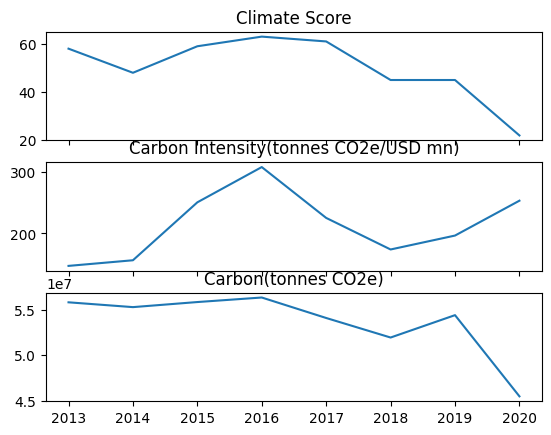

In [337]:
## import matplotlib.pyplot as plt
fig,axes= plt.subplots((3),sharex=True,)

axes[0].plot(df_test['Climate Score'])
axes[0].set_title('Climate Score')
axes[1].plot(df_test['Carbon Intensity(tonnes CO2e/USD mn)'])
axes[1].set_title('Carbon Intensity(tonnes CO2e/USD mn)')
axes[2].plot(df_test['Carbon(tonnes CO2e)'])
axes[2].set_title('Carbon(tonnes CO2e)')

In [293]:
d_res.index.get_level_values('TCUID').unique()

Int64Index([ 42694,  42695,  42696,  42697,  42698,  42699,  42700,  42701,
             42703,  42704,
            ...
            244988, 245043, 245129, 245223, 245247, 245293, 245506, 246029,
            246121, 247869],
           dtype='int64', name='TCUID', length=3112)

In [ ]:
d_res.index.get_level_values('TCUID').unique()

Multiindex DataFrame for PCA (Climate Score, Carbon intensity, Carbon)

In [346]:
d_res.head(3)

Carbon Intensity(tonnes CO2e/USD mn)  \
TCUID Company             GICS Industry Name Year                                         
42694 Erste Group Bank AG Banks              2013                             11.549567   
                                             2014                             10.577313   
                                             2015                             13.107053   

                                                   Carbon(tonnes CO2e)  \
TCUID Company             GICS Industry Name Year                        
42694 Erste Group Bank AG Banks              2013        114363.735690   
                                             2014         99902.501275   
                                             2015        105393.464240   

                                                  Climate Score  
TCUID Company             GICS Industry Name Year                
42694 Erste Group Bank AG Banks              2013          23.0  
                                             2014          46.0  
                                             2015          22.0

In [352]:
d_pca=d_res.droplevel(level=[1,2]).swaplevel().unstack()
d_pca

Carbon Intensity(tonnes CO2e/USD mn)                                  \
TCUID                               42694      42695       42696    42697    
Year                                                                         
2013                             11.549567  40.377369  188.508476      NaN   
2014                             10.577313  32.398461  150.779003      NaN   
2015                             13.107053  45.560585  160.295272      NaN   
2016                                   NaN        NaN         NaN      NaN   
2017                                   NaN        NaN         NaN  0.71026   
2018                                   NaN        NaN         NaN      NaN   
2019                                   NaN        NaN         NaN      NaN   
2020                              8.607000  60.673000  164.427000  2.86800   
2021                                   NaN        NaN         NaN      NaN   

                                                                            \
TCUID     42698        42699     42700   42701  42703     42704     42705    
Year                                                                         
2013   12.027553  2738.217278  4.403150     NaN    NaN  5.908388  6.647394   
2014   11.070949  2460.805912  5.439877     NaN    NaN  5.257736  7.659622   
2015   11.370412  2143.365827  5.553444     NaN    NaN  4.811681  9.221192   
2016         NaN  2427.318897       NaN     NaN    NaN       NaN       NaN   
2017         NaN  2281.168619       NaN     NaN    NaN       NaN  9.273169   
2018         NaN  1919.157000       NaN     NaN    NaN       NaN  8.760405   
2019         NaN          NaN       NaN     NaN    NaN       NaN  9.449499   
2020   13.292000  2106.018000  7.934000  63.028  4.606  3.614000  9.947000   
2021         NaN          NaN       NaN     NaN    NaN       NaN       NaN   

                                                                           \
TCUID 42708     42710      42711      42712   42713   42716        42717    
Year                                                                        
2013     NaN       NaN  48.522776   9.305241     NaN     NaN  1669.342037   
2014     NaN       NaN  59.324409   9.778586     NaN     NaN  1346.987751   
2015     NaN       NaN  63.153902  10.356979     NaN     NaN  2011.829044   
2016     NaN       NaN        NaN        NaN     NaN     NaN          NaN   
2017     NaN       NaN        NaN        NaN     NaN     NaN          NaN   
2018     NaN  3.672741        NaN        NaN     NaN     NaN          NaN   
2019     NaN  3.700031        NaN        NaN     NaN     NaN          NaN   
2020   1.615  2.924000  74.576000   9.349000  77.456  71.821  2550.000000   
2021     NaN       NaN        NaN        NaN     NaN     NaN          NaN   

                                                                            \
TCUID       42719     42720      42723  42725  42727      42732     42741    
Year                                                                         
2013   1070.389701  2.126080  20.208761    NaN    NaN  69.609991  2.258785   
2014   1143.169889  3.095428  17.475930    NaN    NaN  51.014087  1.970343   
2015   1279.306677  7.993741  15.033389    NaN    NaN  49.723399  2.498882   
2016           NaN       NaN        NaN    NaN    NaN        NaN       NaN   
2017           NaN       NaN        NaN    NaN    NaN        NaN  6.307084   
2018           NaN       NaN        NaN    NaN    NaN  34.254011  6.218834   
2019           NaN       NaN        NaN    NaN    NaN  27.656000  6.259991   
2020    929.001000  9.752000   8.613000  9.221  35.21  33.159000  5.798000   
2021           NaN       NaN        NaN    NaN    NaN        NaN       NaN   

                                                                     \
TCUID     42742      42745     42746        42747     42748  42749    
Year                                                                  
2013   46.272918  78.592786       NaN  4846.011411       

In [353]:
d_pca.dropna(axis=1)

Carbon Intensity(tonnes CO2e/USD mn)                                  \
TCUID                                44130      47561     51444      51785   
Year                                                                         
2013                            579.825088   1.957238  3.167692  15.600059   
2014                            450.721601   2.386243  3.866779  17.278996   
2015                            281.043260   2.299944  3.959486  16.644262   
2016                            280.499480   4.056532  4.019057  16.737865   
2017                            248.544445   4.298265  4.433856  17.462065   
2018                            266.034000   4.005137  4.180970  18.126286   
2019                            987.814000   3.550000  3.631117  16.864072   
2020                           1030.449000   3.414000  3.463000  16.928000   
2021                          18145.251000  10.295000  3.653000  69.539000   

                Carbon(tonnes CO2e)                               \
TCUID     52226               44130          47561         51444   
Year                                                               
2013   1.957238        2.592476e+07   18154.758435   9629.477716   
2014   2.386243        2.188488e+07   19684.530079  11848.919199   
2015   2.299944        1.432300e+07   21778.671183  12905.530451   
2016   2.132935        1.215928e+07   41744.790718  12083.623014   
2017   2.088252        9.037999e+06   50283.925336  15114.413665   
2018   1.984316        1.100544e+07   52636.705004  16193.834975   
2019   3.253000        9.504643e+06   46797.567000  14737.486754   
2020   3.481000        8.906002e+06   43393.073000   9450.477000   
2021   3.953000        1.617000e+08  134000.000000  17517.506000   

                                   Climate Score                          
TCUID          51785         52226         44130 47561 51444 51785 52226  
Year                                                                      
2013   230197.342707   4035.891836           9.0  23.0   4.0   3.0   4.0  
2014   245160.083393   5208.479008          59.0  23.0   4.0   5.0   4.0  
2015   250546.494372   5446.428429          50.0  23.0   4.0   5.0   4.0  
2016   257954.593006   4898.933094          64.0   4.0   4.0   2.0   4.0  
2017   248244.361897   5567.612405          73.0   5.0   5.0   2.0   5.0  
2018   235354.903262   6111.067858          15.0   3.0   3.0  72.0   3.0  
2019   195615.551079  10275.276000          79.0   3.0   3.0  93.0   3.0  
2020   209825.754000   7147.297000          90.0   3.0   3.0  81.0   3.0  
2021   948496.788000  16499.366000          90.0   3.0   3.0  79.0   3.0

9

In [3]:
dw=pd.read_csv("/Users/nadirgmira/code/carbon-forecast/raw_data/Historical_Emissions.csv")
dw.head(3)

TCUID              Company          ISIN  Financial Year  GICS Sector Code  \
0  42694  Erste Group Bank AG  AT0000652011            2005              40.0   
1  42694  Erste Group Bank AG  AT0000652011            2006              40.0   
2  42694  Erste Group Bank AG  AT0000652011            2007              40.0   

  GICS Sector Name  GICS Industry Group Code GICS Industry Group Name  \
0       Financials                    4010.0                    Banks   
1       Financials                    4010.0                    Banks   
2       Financials                    4010.0                    Banks   

   GICS Industry Code GICS Industry Name  ...  GHG-Direct Impact Ratio (%)  \
0            401010.0              Banks  ...                     0.004432   
1            401010.0              Banks  ...                     0.004389   
2            401010.0              Banks  ...                     0.004347   

  GHG-Indirect Impact Ratio (%) GHG-Total Impact Ratio (%) Carbon Disclosure  \
0                      0.099679                   0.104111    Estimated data   
1                      0.094311                   0.098701    Estimated data   
2                      0.091684                   0.096031    Estimated data   

  Carbon-Weighted Disclosure (%) Revenue (USD mn)  Currency Code  \
0                            0.0      5638.151346            EUR   
1                            0.0      9596.196598            EUR   
2                            0.0      9036.210000            EUR   

     Accounting Year End  FigureRestate           EffectiveDate  
0  2005-12-31 00:00:00.0              0  2009-05-15 12:48:46.67  
1  2006-12-31 00:00:00.0              0  2009-05-15 12:48:46.67  
2  2007-12-31 00:00:00.0              0  2009-05-15 12:48:46.67  

[3 rows x 41 columns]

In [15]:
dt_result=pd.merge(dw,dz,on='TCUID')
dt_result.head(3)



TCUID              Company          ISIN  Financial Year  GICS Sector Code  \
0  42694  Erste Group Bank AG  AT0000652011            2005              40.0   
1  42694  Erste Group Bank AG  AT0000652011            2006              40.0   
2  42694  Erste Group Bank AG  AT0000652011            2007              40.0   

  GICS Sector Name  GICS Industry Group Code GICS Industry Group Name  \
0       Financials                    4010.0                    Banks   
1       Financials                    4010.0                    Banks   
2       Financials                    4010.0                    Banks   

   GICS Industry Code GICS Industry Name  ...  Carbon-Weighted Disclosure (%)  \
0            401010.0              Banks  ...                             0.0   
1            401010.0              Banks  ...                             0.0   
2            401010.0              Banks  ...                             0.0   

  Revenue (USD mn) Currency Code    Accounting Year End FigureRestate  \
0      5638.151346           EUR  2005-12-31 00:00:00.0             0   
1      9596.196598           EUR  2006-12-31 00:00:00.0             0   
2      9036.210000           EUR  2007-12-31 00:00:00.0             0   

            EffectiveDate                    Company Name    MI ID  \
0  2009-05-15 12:48:46.67  Erste Group Bank AG (WBAG:EBS)  4089743   
1  2009-05-15 12:48:46.67  Erste Group Bank AG (WBAG:EBS)  4089743   
2  2009-05-15 12:48:46.67  Erste Group Bank AG (WBAG:EBS)  4089743   

   Industry (SAM)  Climate Strategy Score  
0       BNK Banks                     8.0  
1       BNK Banks                     8.0  
2       BNK Banks                     8.0  

[3 rows x 45 columns]

In [18]:
df=dt_result[['TCUID','Company','Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)','Climate Strategy Score','Financial Year']]

In [26]:
pivot=df.pivot_table(index=['TCUID','Financial Year']
                     ,values=['Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)','Climate Strategy Score'])
# group=df.groupby(by=['TCUID','Financial Year'])
pivot

Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)  \
TCUID  Financial Year                                                  
42694  2005                                                 1.347260   
       2006                                                 1.308070   
       2007                                                 1.270021   
       2008                                                 1.139229   
       2009                                                 2.403201   
...                                                              ...   
248157 2020                                                 5.241000   
248165 2020                                                 3.606000   
248200 2020                                                 3.606000   
248219 2020                                               594.947000   
248243 2020                                                12.648000   

                       Climate Strategy Score  
TCUID  Financial Year                          
42694  2005                               8.0  
       2006                               8.0  
       2007                               8.0  
       2008                               8.0  
       2009                               8.0  
...                                       ...  
248157 2020                               0.0  
248165 2020                               0.0  
248200 2020                               5.0  
248219 2020                               0.0  
248243 2020                               0.0  

[87233 rows x 2 columns]

In [31]:
pivot.loc[44518,:]

Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)  \
Financial Year                                                  
2005                                               506.988237   
2006                                               284.807192   
2007                                               252.242832   
2008                                               230.987035   
2009                                               292.590651   
2010                                               244.959268   
2011                                               180.393986   
2012                                               183.231450   
2013                                               183.135592   
2014                                               187.916002   
2015                                               252.498714   
2016                                               263.117474   
2017                                               211.411733   
2018                                               194.443302   
2019                                               204.223000   
2020                                               297.149000   

                Climate Strategy Score  
Financial Year                          
2005                              87.0  
2006                              87.0  
2007                              87.0  
2008                              87.0  
2009                              87.0  
2010                              87.0  
2011                              87.0  
2012                              87.0  
2013                              87.0  
2014                              87.0  
2015                              87.0  
2016                              87.0  
2017                              87.0  
2018                              87.0  
2019                              87.0  
2020                              87.0

<AxesSubplot:xlabel='Climate Strategy Score', ylabel='Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)'>

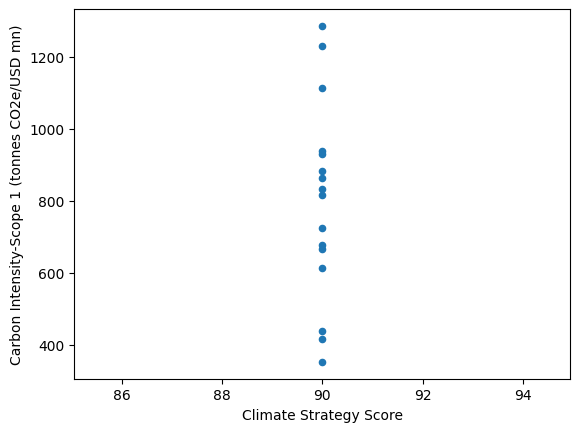

In [29]:

pivot.loc[49667,:].plot(y='Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)'
                            ,x='Climate Strategy Score',kind='scatter')

In [9]:
dt_result.columns.tolist()
df=dt_result[['Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)','Climate Strategy Score']]

In [14]:
dt_result.plot(y='Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)',x='Climate Strategy Score'
               ,kind='scatter')
dt_result.loc[49667,:].plot(y='Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)'
                            ,x='Climate Strategy Score',kind='scatter')

TCUID                                                                                                          104785
Company                                                                            China Minsheng Banking Corp., Ltd.
ISIN                                                                                                     CNE0000015Y0
Financial Year                                                                                                   2008
GICS Sector Code                                                                                                 40.0
GICS Sector Name                                                                                           Financials
GICS Industry Group Code                                                                                       4010.0
GICS Industry Group Name                                                                                        Banks
GICS Industry Code                                      

<AxesSubplot:xlabel='Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)', ylabel='Climate Strategy Score'>

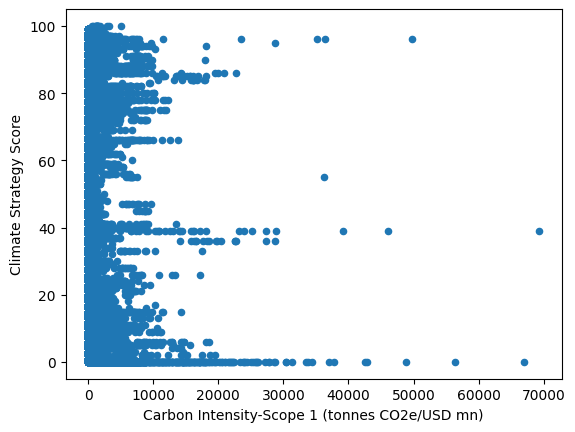

In [12]:
import matplotlib.pyplot as plt


dt_result.plot(y='Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)',x='Climate Strategy Score',kind='scatter')

In [42]:
dy=pd.read_csv("/Users/nadirgmira/code/carbon-forecast/raw_data/SectorRev.csv")
dy.head(3)

TCUID              Company          ISIN  Financial Year  GICS Sector Code  \
0  42694  Erste Group Bank AG  AT0000652011            2005                40   
1  42694  Erste Group Bank AG  AT0000652011            2006                40   
2  42694  Erste Group Bank AG  AT0000652011            2007                40   

  GICS Sector Name  GICS Industry Group Code GICS Industry Group Name  \
0       Financials                      4010                    Banks   
1       Financials                      4010                    Banks   
2       Financials                      4010                    Banks   

   GICS Industry Code GICS Industry Name  GICS Sub Industry Code  \
0              401010              Banks                40101010   
1              401010              Banks                40101010   
2              401010              Banks                40101010   

  GICS Sub Industry Name                                   GICS Description  \
0      Diversified Banks  Commercial banks whose businesses are derived ...   
1      Diversified Banks  Commercial banks whose businesses are derived ...   
2      Diversified Banks  Commercial banks whose businesses are derived ...   

   Country                                Trucost Sector Name Trucost Sector  \
0  AUSTRIA  Monetary authorities and depository credit int...         52A000   
1  AUSTRIA  Monetary authorities and depository credit int...         52A000   
2  AUSTRIA  Monetary authorities and depository credit int...         52A000   

   Trucost Sector Revenue (USD mn)  Trucost Sector Revenue Percentage (%)  \
0                      5638.151346                                    1.0   
1                      9596.196598                                    1.0   
2                      9036.210000                                    1.0   

   FigureRestate           EffectiveDate  
0              0  2009-05-15 12:48:46.67  
1              0  2009-05-15 12:48:46.67  
2              0  2009-05-15 12:48:46.67

In [45]:
dy['Trucost Sector Name'].unique()

array(['Monetary authorities and depository credit intermediation',
       'Securities, commodity contracts, investments, and related activities',
       'Real estate', 'Telecommunications',
       'Paperboard container manufacturing',
       'Coated and laminated paper, packaging paper and plastics film manufacturing',
       'Plastics packaging materials and unlaminated film and sheet manufacturing',
       'Miscellaneous Nondurable Goods Wholesalers',
       'Management of companies and enterprises',
       'Funds, trusts, and other financial vehicles',
       'Insurance carriers',
       'Nondepository credit intermediation and related activities',
       'Insurance agencies, brokerages, and related activities',
       'Alumina refining and primary aluminum production',
       'General Merchandise Stores', 'Gasoline Stations',
       'Food, Beverage, Health, and Personal Care Stores', 'Breweries',
       'Internet service providers and web search portals',
       'All other miscell

In [43]:
dy['Trucost Sector Name'].value_counts()

Real estate                                                             15748
Securities, commodity contracts, investments, and related activities     9354
Monetary authorities and depository credit intermediation                8492
Nondepository credit intermediation and related activities               5278
Pharmaceutical preparation manufacturing                                 4631
                                                                        ...  
Electron tube manufacturing                                                 6
Grantmaking, giving, and social advocacy organizations                      6
Independent artists, writers, and performers                                3
Machine shops                                                               3
General Federal defense government services                                 2
Name: Trucost Sector Name, Length: 447, dtype: int64

In [35]:
dx=pd.read_excel("/Users/nadirgmira/code/carbon-forecast/raw_data/All_features_v2.xlsx")
dx

company_name     TCUID    MI_ID  \
0      "Bank "Saint-Petersburg" Public Joint-Stock Co...  185037.0  4238385   
1                       &Do Holdings Co.,Ltd. (TSE:3457)  236994.0  4984797   
2                                      1&1 AG (XTRA:1U1)  185334.0  8169504   
3                              1000mercis (ENXTPA:ALMIL)  203522.0  4989826   
4                      10x Genomics, Inc. (NASDAQGS:TXG)  244864.0  5248867   
...                                                  ...       ...      ...   
17463                                 Zyla Life Sciences  214064.0  4813060   
17464                        Zymergen Inc. (NASDAQGS:ZY)  247962.0  5271683   
17465                         Zymeworks Inc. (NYSE:ZYME)  234309.0  5148240   
17466      Zynerba Pharmaceuticals, Inc. (NASDAQGM:ZYNE)  220310.0  4813026   
17467                        Zynex, Inc. (NASDAQGS:ZYXI)  239643.0  4811254   

       intensity_scope1_CY2021  intensity_scope1_CY2020  \
0                          NaN                    0.738   
1                          NaN                   13.058   
2                          NaN                    5.241   
3                          NaN                    7.519   
4                          NaN                   17.922   
...                        ...                      ...   
17463                      NaN                      NaN   
17464                      NaN                   13.948   
17465                   13.078                   13.948   
17466                      NaN                      NaN   
17467                      NaN                   21.079   

       intensity_scope1_CY2019  intensity_scope1_CY2018  \
0                     0.791709                 0.857311   
1                    13.519254                14.117776   
2                     5.293000                 5.290000   
3                     7.546698                 7.510652   
4                          NaN                      NaN   
...                        ...                      ...   
17463                      NaN                      NaN   
17464                      NaN                      NaN   
17465                14.124000                14.653002   
17466                      NaN                14.653002   
17467                20.986108                21.013201   

       intensity_scope1_CY2017  intensity_scope1_CY2016  \
0                     0.944439                      NaN   
1                    15.440240                      NaN   
2                          NaN                      NaN   
3                     7.621000                 7.669379   
4                          NaN                      NaN   
...                        ...                      ...   
17463                17.323461                18.623846   
17464                      NaN                      NaN   
17465                      NaN                      NaN   
17466                      NaN                14.928056   
17467                      NaN                      NaN   

       intensity_scope1_CY2015  ...  intensity_scope3CY2019  \
0                          NaN  ...               22.319502   
1                          NaN  ...               39.202094   
2                          NaN  ...               49.703000   
3                     7.814625  ...               42.154929   
4                          NaN  ...                     NaN   
...                        ...  ...                     ...   
17463                      NaN  ...                     NaN   
17464                      NaN  ...                     NaN   
17465                      NaN  ...               80.757000   
17466                      NaN  ...                     NaN   
17467                      NaN  ...              105.531780   

       intensity_scope3CY2018  intensity_scope3CY2017  intensity_scope3CY2016  \
0                   23.871367               24.806812                     NaN   
1                   45.770737               51.26

In [39]:
dx['disclosureCY2020'].value_counts()

0.000      11591
100.000     3248
99.999        67
99.998        40
99.996        28
           ...  
98.793         1
87.970         1
99.314         1
23.059         1
70.236         1
Name: disclosureCY2020, Length: 1451, dtype: int64

In [33]:
%pprint

Pretty printing has been turned ON


In [34]:
dx.columns.tolist()

['company_name',
 'TCUID',
 'MI_ID',
 'intensity_scope1_CY2021',
 'intensity_scope1_CY2020',
 'intensity_scope1_CY2019',
 'intensity_scope1_CY2018',
 'intensity_scope1_CY2017',
 'intensity_scope1_CY2016',
 'intensity_scope1_CY2015',
 'intensity_scope1_CY2014',
 'intensity_scope1_CY2013',
 'intensity_scope1_CY2012',
 'intensity_scope1_CY2011',
 'intensity_scope1_CY2010',
 'disclosureCY0',
 'disclosureCY2021',
 'disclosureCY2020',
 'disclosureCY2019',
 'disclosureCY2018',
 'disclosureCY2017',
 'disclosureCY2016',
 'disclosureCY2015',
 'disclosureCY2014',
 'disclosureCY2013',
 'disclosureCY2012',
 'disclosureCY2011',
 'disclosureCY2010',
 'Sector',
 'Industry Group',
 'Industry',
 'Primary Industry',
 'Country / Region Name',
 'S&P Credit Rating',
 'Full Time Employees\n(actual)',
 'Total Enterprise Value (CIQ)\n($M)',
 'revenueCY0',
 'revenueCY2021',
 'revenueCY2020',
 'revenueCY2019',
 'revenueCY2018',
 'revenueCY2017',
 'revenueCY2016',
 'revenueCY2015',
 'revenueCY2014',
 'revenueCY20

In [21]:
dx

company_name     TCUID    MI_ID  \
0      "Bank "Saint-Petersburg" Public Joint-Stock Co...  185037.0  4238385   
1                       &Do Holdings Co.,Ltd. (TSE:3457)  236994.0  4984797   
2                                      1&1 AG (XTRA:1U1)  185334.0  8169504   
3                              1000mercis (ENXTPA:ALMIL)  203522.0  4989826   
4                      10x Genomics, Inc. (NASDAQGS:TXG)  244864.0  5248867   
...                                                  ...       ...      ...   
17463                                 Zyla Life Sciences  214064.0  4813060   
17464                        Zymergen Inc. (NASDAQGS:ZY)  247962.0  5271683   
17465                         Zymeworks Inc. (NYSE:ZYME)  234309.0  5148240   
17466      Zynerba Pharmaceuticals, Inc. (NASDAQGM:ZYNE)  220310.0  4813026   
17467                        Zynex, Inc. (NASDAQGS:ZYXI)  239643.0  4811254   

       intensity_scope1_CY2021  intensity_scope1_CY2020  \
0                          NaN                    0.738   
1                          NaN                   13.058   
2                          NaN                    5.241   
3                          NaN                    7.519   
4                          NaN                   17.922   
...                        ...                      ...   
17463                      NaN                      NaN   
17464                      NaN                   13.948   
17465                   13.078                   13.948   
17466                      NaN                      NaN   
17467                      NaN                   21.079   

       intensity_scope1_CY2019  intensity_scope1_CY2018  \
0                     0.791709                 0.857311   
1                    13.519254                14.117776   
2                     5.293000                 5.290000   
3                     7.546698                 7.510652   
4                          NaN                      NaN   
...                        ...                      ...   
17463                      NaN                      NaN   
17464                      NaN                      NaN   
17465                14.124000                14.653002   
17466                      NaN                14.653002   
17467                20.986108                21.013201   

       intensity_scope1_CY2017  intensity_scope1_CY2016  \
0                     0.944439                      NaN   
1                    15.440240                      NaN   
2                          NaN                      NaN   
3                     7.621000                 7.669379   
4                          NaN                      NaN   
...                        ...                      ...   
17463                17.323461                18.623846   
17464                      NaN                      NaN   
17465                      NaN                      NaN   
17466                      NaN                14.928056   
17467                      NaN                      NaN   

       intensity_scope1_CY2015  ...  intensity_scope3CY2019  \
0                          NaN  ...               22.319502   
1                          NaN  ...               39.202094   
2                          NaN  ...               49.703000   
3                     7.814625  ...               42.154929   
4                          NaN  ...                     NaN   
...                        ...  ...                     ...   
17463                      NaN  ...                     NaN   
17464                      NaN  ...                     NaN   
17465                      NaN  ...               80.757000   
17466                      NaN  ...                     NaN   
17467                      NaN  ...              105.531780   

       intensity_scope3CY2018  intensity_scope3CY2017  intensity_scope3CY2016  \
0                   23.871367               24.806812                     NaN   
1                   45.770737               51.26

In [12]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 4.8 MB/s eta 0:00:00a 0:00:01


In [13]:
dx=pd.read_excel("/Users/nadirgmira/code/carbon-forecast/raw_data/All_features.xlsx")

In [15]:
dx.columns.tolist()

['company_name',
 'TCUID',
 'MI_ID',
 'intensity_scope1_CY2021',
 'intensity_scope1_CY2020',
 'intensity_scope1_CY2019',
 'intensity_scope1_CY2018',
 'intensity_scope1_CY2017',
 'intensity_scope1_CY2016',
 'intensity_scope1_CY2015',
 'intensity_scope1_CY2014',
 'intensity_scope1_CY2013',
 'intensity_scope1_CY2012',
 'intensity_scope1_CY2011',
 'intensity_scope1_CY2010',
 'disclosureCY0',
 'disclosureCY2021',
 'disclosureCY2020',
 'disclosureCY2019',
 'disclosureCY2018',
 'disclosureCY2017',
 'disclosureCY2016',
 'disclosureCY2015',
 'disclosureCY2014',
 'disclosureCY2013',
 'disclosureCY2012',
 'disclosureCY2011',
 'disclosureCY2010',
 'Sector',
 'Industry Group',
 'Industry',
 'Primary Industry',
 'Country / Region Name',
 'S&P Credit Rating',
 'Full Time Employees\n(actual)',
 'Total Enterprise Value (CIQ)\n($M)',
 'revenueCY0',
 'revenueCY2021',
 'revenueCY2020',
 'revenueCY2019',
 'revenueCY2018',
 'revenueCY2017',
 'revenueCY2016',
 'revenueCY2015',
 'revenueCY2014',
 'revenueCY20

In [16]:
di

TCUID                      Company          ISIN  Financial Year  \
0        42694          Erste Group Bank AG  AT0000652011            2005   
1        42694          Erste Group Bank AG  AT0000652011            2006   
2        42694          Erste Group Bank AG  AT0000652011            2007   
3        42694          Erste Group Bank AG  AT0000652011            2008   
4        42694          Erste Group Bank AG  AT0000652011            2008   
...        ...                          ...           ...             ...   
274106  248219          Sylvamo Corporation  US8713321029            2020   
274107  248243  Apartment Income REIT Corp.  US03750L1098            2020   
274108  248356                   Cogelec SA  FR0013335742            2020   
274109  248357        Global Bioenergies SA  FR0011052257            2020   
274110  248357        Global Bioenergies SA  FR0011052257            2021   

        GICS Sector Code        GICS Sector Name  GICS Industry Group Code  \
0                     40              Financials                      4010   
1                     40              Financials                      4010   
2                     40              Financials                      4010   
3                     40              Financials                      4010   
4                     40              Financials                      4010   
...                  ...                     ...                       ...   
274106                15               Materials                      1510   
274107                60             Real Estate                      6010   
274108                45  Information Technology                      4520   
274109                15               Materials                      1510   
274110                15               Materials                      1510   

               GICS Industry Group Name  GICS Industry Code  \
0                                 Banks              401010   
1                                 Banks              401010   
2                                 Banks              401010   
3                                 Banks              401010   
4                                 Banks              401010   
...                                 ...                 ...   
274106                        Materials              151050   
274107                      Real Estate              601010   
274108  Technology Hardware & Equipment              452010   
274109                        Materials              151010   
274110                        Materials              151010   

                                  GICS Industry Name  GICS Sub Industry Code  \
0                                              Banks                40101010   
1                                              Banks                40101010   
2                                              Banks                40101010   
3                                              Banks                40101010   
4                                              Banks                40101010   
...                                              ...                     ...   
274106                       Paper & Forest Products                15105020   
274107  Equity Real Estate Investment Trusts (REITs)                60101060   
274108                      Communications Equipment                45201020   
274109                                     Chemicals                15101010   
274110                                     Chemicals                15101010   

          GICS Sub Industry Name  \
0              Diversified Banks   
1              Diversified Banks   
2              Diversified Banks   
3              Diversified Banks   
4              Diversified Banks   
...                          ...   
274106            Paper Products   
274107         Residential REITs   
274108  Communications Equipment   
274109       Commodity Chemicals   
274110       Commodity Chemicals 

In [22]:
!pwd

/Users/nadirgmira/code/carbon-forecast/notebooks
